### **Proyecto Aprendizaje No Supervisado**

El siguiente proyecto se basa en la Encuesta Nacional de Calidad de vida 2018 realizada por el DANE, la cuál tiene como objetivo “Obtener información que permita analizar y realizar comparaciones de las condiciones socioeconómicas de los hogares colombianos, las cuales posibiliten hacer seguimiento a las variables necesarias para el diseño e implementación de políticas públicas.”

En el siguiente enlace se puede profundizar sobre esta encuesta y evaluar su ficha técnica, presentación, comunicado de prensa entre otros: https://www.dane.gov.co/index.php/estadisticas-por-tema/salud/calidad-de-vida-ecv/encuesta-nacional-de-calidad-de-vida-ecv-2019

Luego de analizar las diferentes encuestas en los diversos temas, se procede a analizar la encuestas de los datos de la vivienda, esta base de datos contiene información sobre las características de las diferentes viviendas en Colombia, en el siguiente link se encuentra el directorio de datos: https://microdatos.dane.gov.co/index.php/catalog/678/data-dictionary/F137?file_name=Datos%20de%20la%20vivienda

En el presente notebook, se pretende realizar un análisis estadístico de esta base de datos, estudiar los diferentes tipos de datos, estadísticas, gráficas y relaciones entre las diferentes variables.


In [ ]:
#Instalación de librerías necesarias
!pip install kneed
!pip install scikit-learn-extra

In [ ]:
#Carga de librerías necesarias y carga de los datos
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import folium
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from IPython.display import display, clear_output
from ipywidgets import interactive
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Carga de los datos
df = pd.read_csv('Datos de la vivienda.csv', sep=';')
df

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,REGION,P1_DEPARTAMENTO,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,...,P5661,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7,FEX_C
0,7120001,1,1,1,1,13,1,1,1,2,...,,1,1,1,1,1,1,1,1,"208,34913730011"
1,7120002,1,1,1,1,13,1,1,1,1,...,,3,4,1,2,1,1,1,3,"306,477351890009"
2,7120005,1,1,1,1,13,1,1,1,1,...,,1,1,1,1,1,1,1,1,"175,390716700227"
3,7120006,1,1,1,1,13,1,1,1,2,...,,3,2,1,1,1,1,1,2,"187,543507465482"
4,7120007,1,1,1,1,13,1,1,1,2,...,,1,2,1,1,1,1,3,2,"384,099292579717"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93156,7247294,1,1,1,1,44,1,1,1,2,...,,2,2,2,1,1,2,2,3,"80,3358080123688"
93157,7247295,1,1,1,1,44,1,1,1,2,...,,2,2,2,1,1,1,1,2,"36,4810008317236"
93158,7247297,1,1,1,1,44,1,1,2,4,...,,1,1,1,2,1,1,2,2,"116,538531673999"
93159,7247298,1,1,1,4,27,1,1,1,2,...,,1,1,1,4,1,1,1,1,"51,6590649500192"


A través de la librería pandas y su función pandas.read_csv se lee el archivo de tipo CSV, ya que la distribución es a través del separador ";", se le asigna este separador al hiperparámetro "sep", se almacena entonces en un dataframe de pandas llamado df.

In [ ]:
print("Las dimensiones del dataframe con la base de datos del DANE sobre los datos de vivienda son son:", df.shape, " es decir, hay ",df.shape[0], "registros y ",df.shape[1],"atributos o características. \n")
print("El tamaño de la base de datos, es decir la cantidad total de datos es:", df.size, "\n")
print("Las filas están organizádas a través de un índice en el siguiente rango: ", df.index, "\n")
print("Los nombres de las columnas dentro de las base de datos son:", df.columns, "\n")
print("\nLa información básica de la base de datos es: \n")
print(df.info())
for column in df.columns:
    print(f"\nTítulo de la columna: {column}")
    unique_values = df[column].unique()
    print(f"\nValores únicos: {unique_values}")
    print("=" * 30)  # Separador visual entre columnas


Las dimensiones del dataframe con la base de datos del DANE sobre los datos de vivienda son son: (93161, 35)  es decir, hay  93161 registros y  35 atributos o características. 

El tamaño de la base de datos, es decir la cantidad total de datos es: 3260635 

Las filas están organizádas a través de un índice en el siguiente rango:  RangeIndex(start=0, stop=93161, step=1) 

Los nombres de las columnas dentro de las base de datos son: Index(['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'REGION',
       'P1_DEPARTAMENTO', 'CANT_HOG_COMPLETOS', 'CANT_HOGARES_VIVIENDA',
       'CLASE', 'P1070', 'P4005', 'P4015', 'P4567', 'P8520', 'P8520S1',
       'P8520S1A1', 'P8520S5', 'P8520S3', 'P8520S4', 'P8520S4A1', 'P4065',
       'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4', 'P5661', 'P5661S1',
       'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9', 'P5661S5', 'P5661S6',
       'P5661S7', 'FEX_C'],
      dtype='object') 


La información básica de la base de datos es: 

<class 'pandas.core.fr

Como primera parte del análisis, se explora el dataframe creado a través de sus diferentes atributos.

-	Mediante el atributo “df.shape”, se exploran las dimensiones del dataframe, este tiene 93161 filas o registros y 35 columnas o características.

-	A través del atributo “df.size”, se explora el número total de datos, es decir la multiplicación entre las filas y las columnas.

-	A través del atributo “df.index”, se explora cómo están indexados los datos, en este caso la indexación la corriendo de 1 en 1 desde el 0 hasta el 93161.
-	Mediante le tributo “df.columns” se exploran los nombres de cada una de las columnas del dataframe.

Luego, se realiza un ciclo que explora los valores únicos por cada una de las columnas, además, en medio de esta exploración de atributos básicos del dataframe se explora el atributo df.info, en conjunto con la explicación del diccionario de datos del DANE se resumen las siguientes variables, su tipo, rango y explicación básica:

-	DIRECTORIO: no es más que el número de registro, su tipo es entero: int64.
-	SECUENCIA_ENCUESTA: consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	SECUENCIA_P:  consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	ORDEN: consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	REGION: representa la región del país en la cual se tomaron los datos, va de un rango de enteros del 1 al 9 distribuidos de la siguiente forma: 1 Caribe, 2 Oriental, 3 Central, 4 Pacífica(sin valle), 5 Bogotá, 6 Antioquia, 7 Valle del cauca, 8 San Andrés, 9 Orinoquía – amazonía, su tipo es entero categórico: int64.
-	P1_DEPARTAMENTO: es un identificador numérico para cada uno de los departamentos de Colombia, la variable tiene 33 valores únicos que representan cada uno de los departamentos, es de tipo entero: int64.
-	CANT_HOG_COMPLETOS: esta variable establece la cantidad de hogares completos que hay en una vivienda, la variable toma valores numéricos que van del rango 1 al 5, el tipo es entero: int64.
-	CANT_HOGARES_VIVIENDA: esta variable establece la cantidad de hogares que hay en una vivienda     int64
-	CLASE: variable categórica entera que toma los siguientes valores: 1 si es cabecera, 2 si son centros poblados, inspección de policía o corregimientos, es de tipo entero: int64.
-	P1070: variable que representa el tipo de vivienda de la siguiente forma: 1 Casa, 2 Apartamento, 3 Cuarto(s), 4 Vivienda tradicional indígena, 5 Otro (carpa, contenedor, vagón, embarcación, cueva, refugio natural, etc), la variable es de tipo numérico: int64
-	P4005: variable que representa el material predominante de las paredes exteriores, toma los siguientes valores enteros: 1 Bloque, ladrillo, piedra, madera pulida; 2 Tapia pisada, adobe; 3 Bahareque revocado; 4 Bahareque sin revocar; 5 Madera burda, tabla, tablón; 6 Material prefabricado; 7 Guadua, caña, esterilla, otro vegetal; 8 Zinc, tela, carbón, latas, desechos, plástico; 9 Sin paredes, su tipo es entero: int64.
-	P4015: variable que representa el material predominante de los pisos, toma los siguientes valores enteros: 1. Alfombra o tapete de pared a pared; 2. Madera pulida y lacada, parqué; 3. Mármol; 4. Baldosa, vinilo, tableta, ladrillo, laminado; 5. Madera burda, tabla, tablón, otro vegetal; 6. Cemento, gravilla; 7. Tierra, arena, su tipo es entero: int64.
-	P4567: variable que representa cuál es el material predominante del techo o cubierta, toma los siguientes valores enteros: 1 Plancha de concreto, cemento u hormigón; 2 Tejas de barro; 3 Teja de asbesto – cemento; 4 Teja metálica o lámina de zinc; 5 Teja plástica; 6 Paja, palma u otros vegetales; 7 Material de desecho (tela, cartón, latas, plástico, otros), su tipo es entero: int64
-	P8520: variable que representa con cuáles de los servicios públicos, privados o comunales cuenta la vivienda, en esta se evidencia que al explorar los datos en Python, el valor único de la variable es “ ”, por lo cual se concluye puede haber un error en esta variable, su tipo es objecto: object.
-	P8520S1: variable binaria que representa si se tiene energía eléctrica o no, toma el valor de 1 cuando cuenta con energía eléctrica y 2 cuando no, su tipo es entero: int64.
-	P8520S1A1: variable categórica entera que representa el estrato para tarifa de la siguiente forma: 1 Bajo – Bajo; 2 Bajo; 3 Medio – Bajo; 4 Medio; 5 Medio – Alto; 6 Alto; 8 Planta eléctrica; 9 No conoce el estrato o no cuenta con recibo de pago; 0 Recibos sin estrato o el servicio es pirata. Al analizar los tipos de datos en Python se observa que estos son de tipos “srt” y que hay valores vacíos, el tipo de datos en Python es un objeto: object.
-	P8520S5: variable categórica entera que representa si se cuenta con acueducto o no, toma el valor de 1 si tiene acueducto y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S3: variable categórica entera que representa si se cuenta con alcantarillado o no, toma el valor de 1 si tiene alcantarillado y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S4: variable categórica entera que representa si se cuenta con recolección de basuras o no, toma el valor de 1 si tiene recolección de basuras y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S4A1: variable categórica entera que toma valores del 0 al 9 y representa la priodicidad mediante la cual se hace recolección de basuras, sus valores son de tipo “str” y el tipo de datos es un objeto: object.
-	P4065: variable categórica que indaga si la vivienda a sido afectada por destrucción parcial o total por desastres naturales, al analizar los datos en Python se encuentra que esta columna solo toma valores de “ ”, por lo cual se concluye que los datos de esta columna no son útiles para el estudio, el tipo de variable en Python es un objeto: object.
-	P4065S1: variable categórica entera que representa si se han presentado inundaciones o desbordamientos de crecientes o arroyos o no, toma el valor de 1 si se han presentado inundaciones o desbordamientos de crecientes o arroyos y 2 si no, el tipo de datos es entero: int64.
-	P4065S2: variable categórica entera que representa si se han presentado avalanchas, derrumbes, deslizamientos o no, toma el valor de 1 si se han presentado avalanchas, derrumbes, deslizamientos y 2 si no, el tipo de datos es entero: int64.
-	P4065S3: variable categórica entera que representa si se ha presentado hundimiento de terreno o no, toma el valor de 1 si se ha presentado hundimiento de terreno y 2 si no, el tipo de datos es entero: int64.
-	P4065S4: variable categórica entera que representa si se han presentado ventarrones, tormenta, vendavales o no, toma el valor de 1 si se han presentado ventarrones, tormenta, vendavales y 2 si no, el tipo de datos es entero: int64.
-	P5661: variable que intenta explicar la frecuencia en la cual se han presentado ciertos problemas de tipo ambiental en el sector, luego de analizar los datos en Python se obtiene que los valores únicos de esa variable son “ ”, por lo cual la columna está vacía y no representa nada para el estudio, el tipo de datos en Python es un objeto: object
-	P5661S1: variable categórica entera que representa el ruido proveniente del exterior de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S2: variable categórica entera que representa malos olores provenientes del exterior de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S3: variable categórica entera que representa la presencia de basuras en las calles, caminos, senderos y espacios públicos de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S4: variable categórica entera que representa la contaminación del aire de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S9: variable categórica entera que representa la contaminación en ríos, canales, lagos y embalses de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S5: variable categórica entera que representa la invasión del espacio público (calles o andenes) de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S6: variable categórica entera que representa la presencia de animales que causan molestias de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S7: variable categórica entera que representa la presencia de animales que causan molestias de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	FEX_C: variable categórica con datos en forma de “str” de carácter numérico de tipo float, la variable cuantifica de forma numérica el factor de expansión y se almacena en un tipo de dato de Python objeto: object.


In [ ]:
columns_to_drop = ['SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'P8520', 'P4065', 'P5661', 'P8520S1', 'P8520S4','P4065S4']
df = df.drop(columns=columns_to_drop)
binary_columns = ['CLASE', 'P8520S5', 'P8520S3', 'P4065S1', 'P4065S2', 'P4065S3']
df[binary_columns] = df[binary_columns].replace(2, 0)
df = df[df.applymap(lambda x: x != " ").all(axis=1)]
#df['FEX_C'] = df['FEX_C'].astype(float), no puede convertir string a float '208,34913730011'
df['P8520S1A1'] = df['P8520S1A1'].astype(int)
df['P8520S4A1'] = df['P8520S4A1'].astype(int)
df

<ipython-input-5-d0d4a502433a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P8520S1A1'] = df['P8520S1A1'].astype(int)
<ipython-input-5-d0d4a502433a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P8520S4A1'] = df['P8520S4A1'].astype(int)


,DIRECTORIO,REGION,P1_DEPARTAMENTO,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,...,P4065S3,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7,FEX_C
0,7120001,1,13,1,1,1,2,1,4,3,...,0,1,1,1,1,1,1,1,1,"208,34913730011"
1,7120002,1,13,1,1,1,1,1,4,3,...,1,3,4,1,2,1,1,1,3,"306,477351890009"
2,7120005,1,13,1,1,1,1,1,4,3,...,1,1,1,1,1,1,1,1,1,"175,390716700227"
3,7120006,1,13,1,1,1,2,1,4,3,...,0,3,2,1,1,1,1,1,2,"187,543507465482"
4,7120007,1,13,1,1,1,2,1,4,3,...,0,1,2,1,1,1,1,3,2,"384,099292579717"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93155,7247293,1,44,1,1,1,3,1,7,4,...,0,1,2,2,1,2,1,1,2,"49,340596628125"
93156,7247294,1,44,1,1,1,2,1,6,3,...,0,2,2,2,1,1,2,2,3,"80,3358080123688"
93157,7247295,1,44,1,1,1,2,1,6,3,...,0,2,2,2,1,1,1,1,2,"36,4810008317236"
93159,7247298,4,27,1,1,1,2,1,4,4,...,0,1,1,1,4,1,1,1,1,"51,6590649500192"


Luego de explorar los atributos básicos del dataframe y estructura de datos se concluye que ciertas columnas no aportan mucho al modelo, además de esto otras requiren ciertas transformaciones, por lo cual se realizan los siguientes cambios:

- Se eliminan las siguientes columnas ya que o bien tienen elementos vacíos en forma de espacio en cadenas de texto (" ") o tienen un solo elemento por columna lo cual no aporta nada al estudio: 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'P8520', 'P4065', 'P5661'.

- Se transforman las clases binarias ya que la base de datos considera los "1" como una respuesta de un "Si" en la encuesta y los "0" como una respuesta de un "No" en la encuesta, se cambian entonces los "2" por "0" en las siguientes columnas: CLASE', 'P8520S1', 'P8520S5', 'P8520S3', 'P8520S4', 'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4'.

- Se eliminan las filas de aquellas observaciones con " " como registro ya que estos son falsos positivos, nos hacen pensar que el registro no está vacío ya que " " es interpretado por python como una cadena de texto, sin embargo esto no nos aporta nada al modelo y puede entorpecer los análisis posteriores por lo que símplemente se eliminan estos registros.

- Se convierten los registros numéricos que están almacenados en forma de texto, se hace entonces la conversión de tipo de datos a las columnas 'P8520S1A1' y 'P8520S4A1'.

realizar los cambios mencionados con anterioridad se obtiene un dataframe reducido con 58772 filas y 29 columnas con el cual se proceden a hacer las descripciones estadísticas.


Estadísticas Descriptivas para las columnas binarias: 

              CLASE       P8520S5       P8520S3       P4065S1       P4065S2  \
count  58772.000000  58772.000000  58772.000000  58772.000000  58772.000000   
mean       0.814231      0.899187      0.762761      0.059858      0.008048   
std        0.388923      0.301084      0.425394      0.237226      0.089350   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            P4065S3  
count  58772.000000  
mean       0.018580  
std        0.135038  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

Proporciones de 1s en Columnas Bi

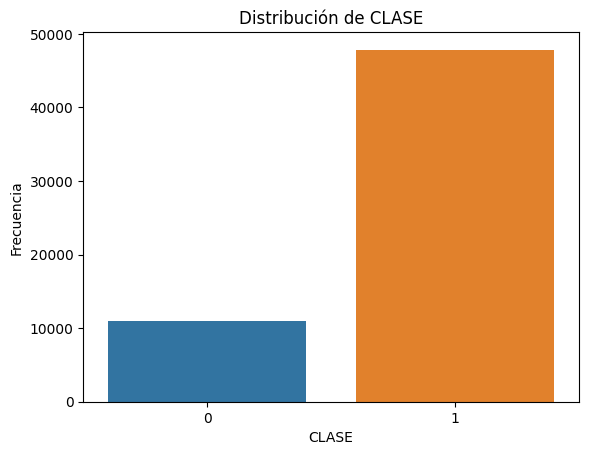

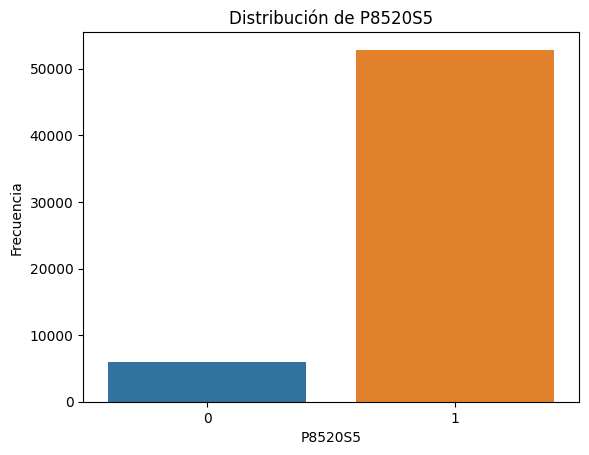

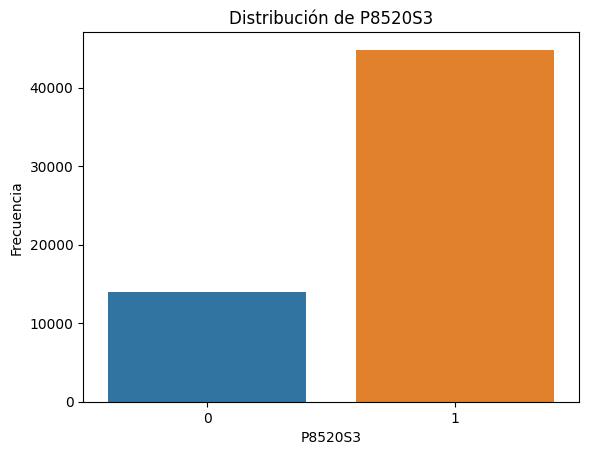

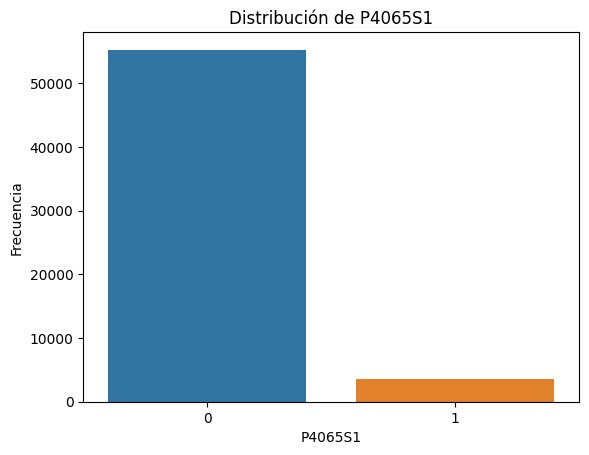

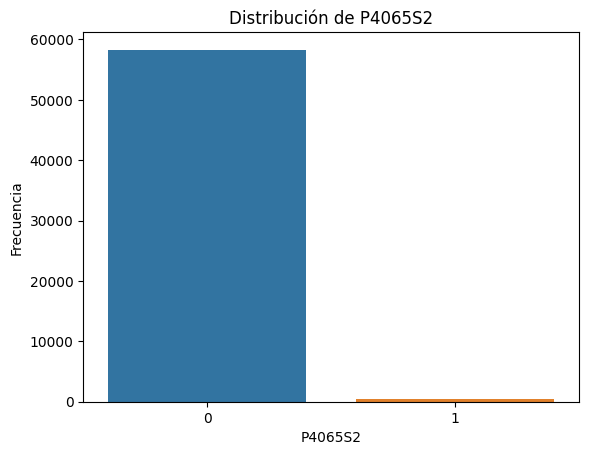

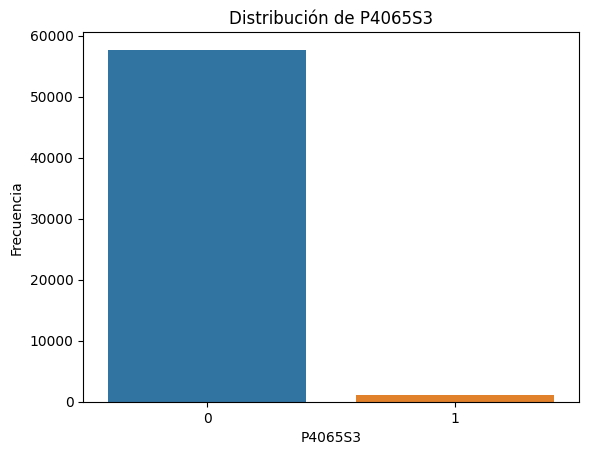

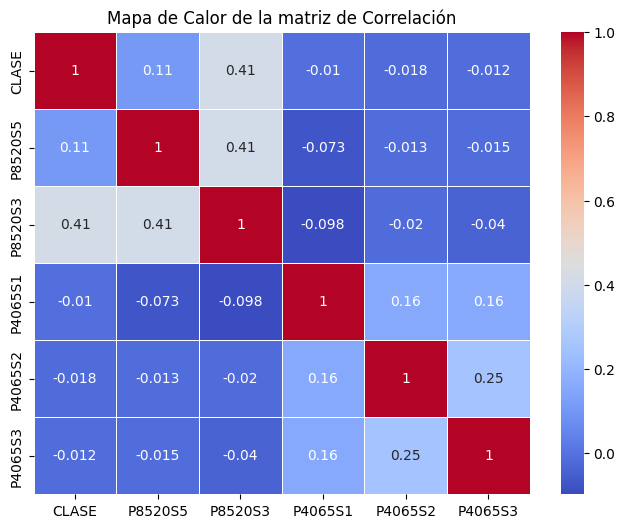

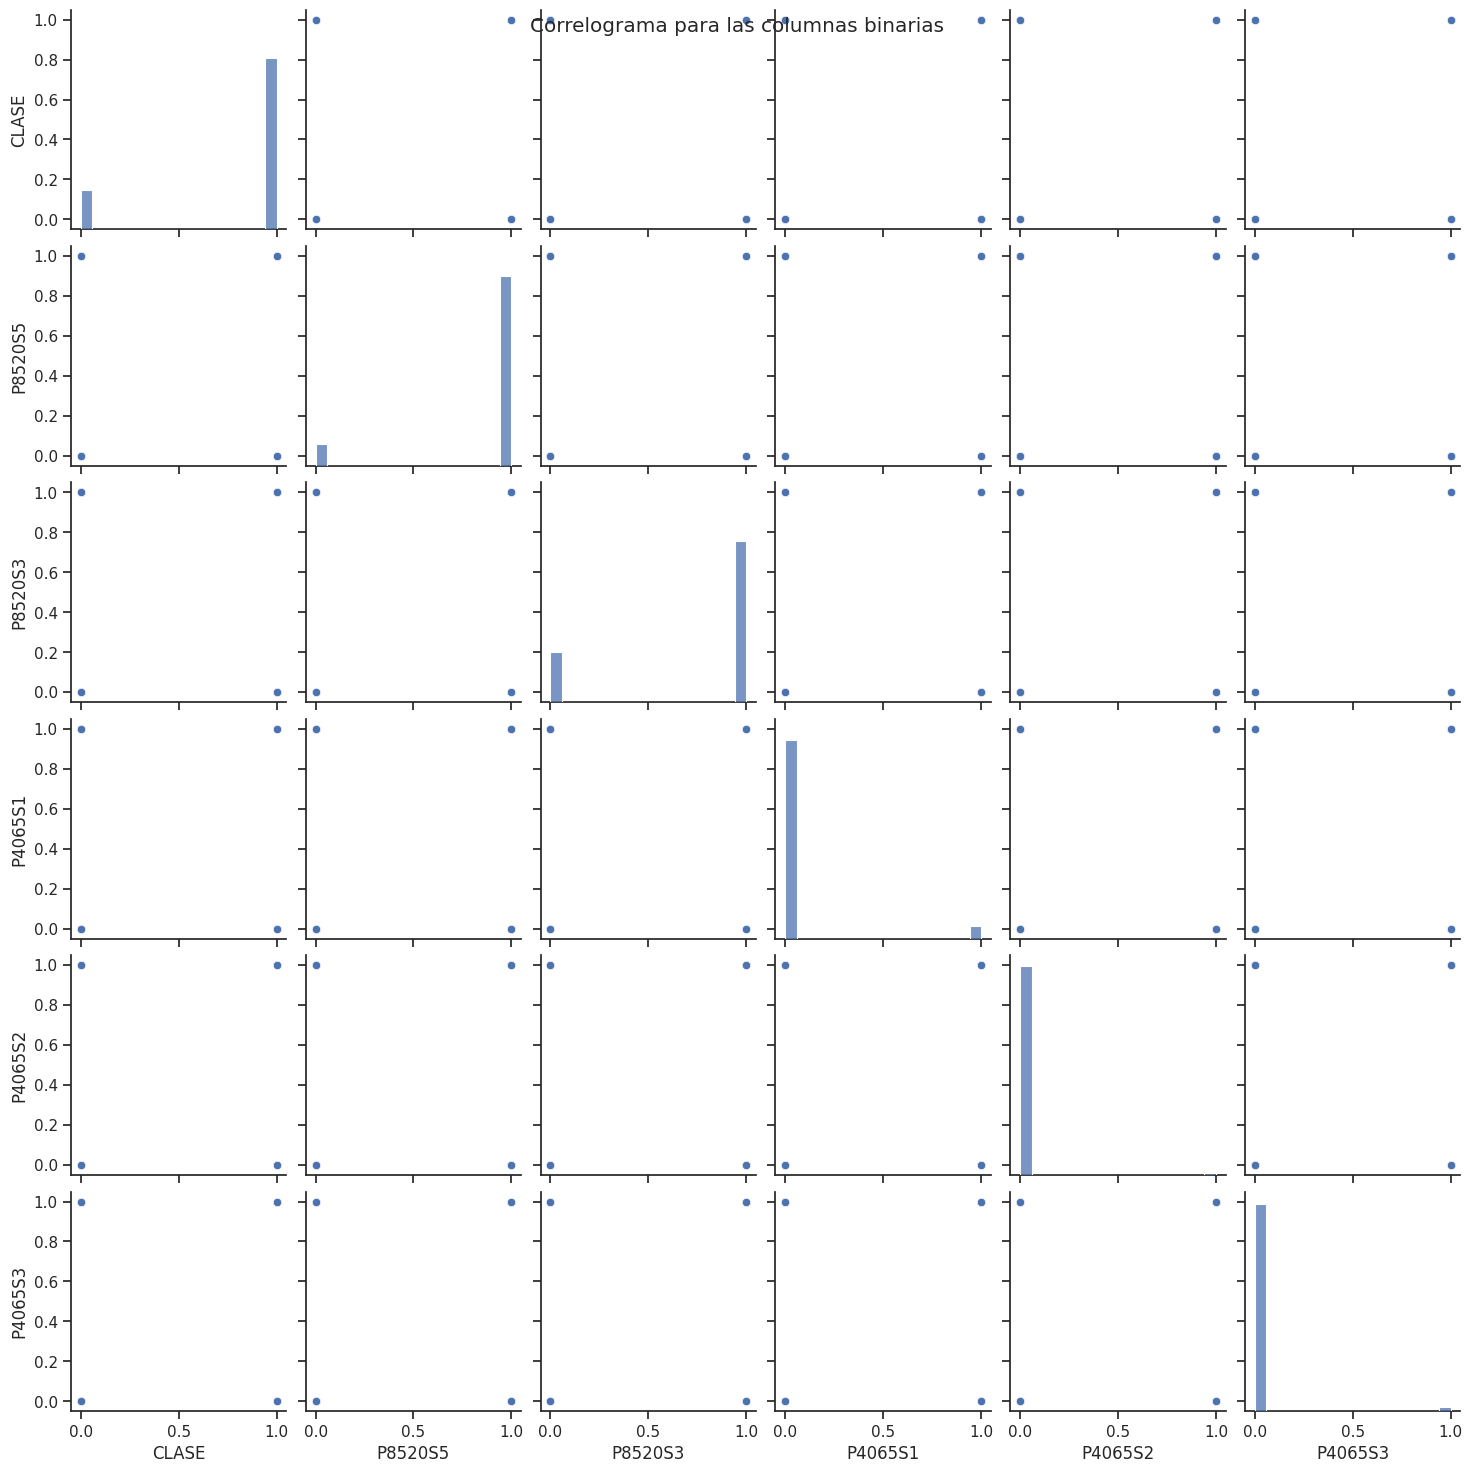

In [ ]:
#Se separan los 3 tipos de variables para hacer los diferentes análisis estadísticos.

# Columnas binarias
binarias = ['CLASE', 'P8520S5', 'P8520S3', 'P4065S1', 'P4065S2', 'P4065S3']
# Columnas categóricas
categoricas = ['REGION', 'P1_DEPARTAMENTO', 'CANT_HOG_COMPLETOS', 'CANT_HOGARES_VIVIENDA',
               'P1070', 'P4005', 'P4015', 'P4567', 'P8520S1A1', 'P8520S4A1', 'P5661S1',
               'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9', 'P5661S5', 'P5661S6', 'P5661S7']
# Columna de texto
texto = 'FEX_C'

# Calcular estadísticas descriptivas para las columnas binarias
desc_stats_binarias = df[binarias].describe()
# Calcular la proporción de 1s en cada columna binaria
proporciones = df[binarias].mean()
# Mostrar las estadísticas descriptivas y las proporciones
print("Estadísticas Descriptivas para las columnas binarias: \n")
print(desc_stats_binarias)
print("\nProporciones de 1s en Columnas Binarias:")
print(proporciones)

print("\nGráficos de barras para evaluar la frecuencia de las variables binarias: \n")
# Gráficos para columnas binarias
for col in binarias:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')

print("\nMatriz de correlación para los datos binarios: \n")
# Calcular la matriz de correlación
correlation_matrix = df[binarias].corr()
print(correlation_matrix)

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la matriz de Correlación')
plt.show()

# Crear un correlograma
sns.set(style="ticks")
sns.pairplot(df[binarias], kind="scatter")
plt.suptitle('Correlograma para las columnas binarias')
plt.show()

Ya que se encuentran variables binarias, categóricas numéricas y una de texto se separan entonces los 3 tipos de variables con el fin de hacer análisis descriptivos separados para las variables.

Se empieza entonces con un análisis a las variables binarias, se realizan analíticas descriptivas a través del atributo “.describe()”, ya que estamos hablando de variables binarias, podemos entonces analizar estas estadísticas desde la perspectiva de proporción de unos y ceros que para el caso de estudio serían respuestas positivas y negativas respectivamente. Así entonces, a través del cuadro generado para cada característica se puede analizar que por ejemplo, para la variable “P8520S5” la cual toma el valor de “1” cuando el encuestado tiene presencia de acueducto en su hogar y “0” cuando no, se observa una media de 0.8991 lo cual desde la óptica del análisis de variables vinarias se traduciría en que en promedio 89.91% de los hogares colombianos encuestados cuentan con acueducto, mientras que el 10.09% restante no, también puede observarse la desviación estándar de este valor que es 0.3010 y nos da una idea de la variabilidad de los datos alrededor de la media, la función también nos arroja valores mínimos, máximos y cuartiles, sin embargo al ser variables binarias son estadísticas que quizá no nos brindan mucha información para nuestro estudio. A nivel general, en todas las estadísticas se observa una predominancia de media alta en los valores lo cual se traduce a que la mayoría de los encuestados respondieron “si” para estas preguntas, en la mayoría por encima del 80%.

Para puntualizar en el análisis anterior, y a través de la librería Matplotlip, se realizan gráficas de cada una de estas variables binarias con el fin de evaluar la distribución de cada variable, primero, puede concluirse por medio de estas que todas las clases están desbalanceadas, hay siempre una predominancia marcada por uno de los posibles valores de la variable binaria.
Finalmente, se evalúa la relación lineal entre las variables binarias a través de 3 elementos: la matriz de correlaciones, el mapa de calor y el correlograma. A través de la matriz de correlaciones, se expresa a través de una tabla la relación lineal entre los pares posibles de variables, este mismo análisis de ve reflejado de forma gráfica en el mapa de calor el cual toma valores cercanos a rojo a medida que va aumentando la relación lineal positiva entre los variables y a azul cuando aumenta la relación lineal negativa. En las variables, puede observarse que no hay una predominancia marcada de relaciones lineales entre las variables, las variables más correlacionadas son “P4065S3” y “P4065S2” con una relación lineal positiva de 0.25. Estos datos también se ven también respaldados por el correlograma que no es más que un gráfico que representa la dispersión por puntos de cada par de variables, en el ejercicio no se evidencia presencia de algún comportamiento lineal entre los pares de variables.


Estadísticas Descriptivas para las columnas categóricas numéricas: 

             REGION  P1_DEPARTAMENTO  CANT_HOG_COMPLETOS  \
count  58772.000000     58772.000000        58772.000000   
mean       3.854557        45.871708            1.012217   
std        2.715334        29.175437            0.133742   
min        1.000000         5.000000            1.000000   
25%        2.000000        18.000000            1.000000   
50%        3.000000        47.000000            1.000000   
75%        6.000000        70.000000            1.000000   
max        9.000000        99.000000            5.000000   

       CANT_HOGARES_VIVIENDA         P1070         P4005         P4015  \
count           58772.000000  58772.000000  58772.000000  58772.000000   
mean                1.012217      1.362707      1.406554      4.781495   
std                 0.133742      0.552361      1.240902      1.058433   
min                 1.000000      1.000000      1.000000      1.000000   
25%                 

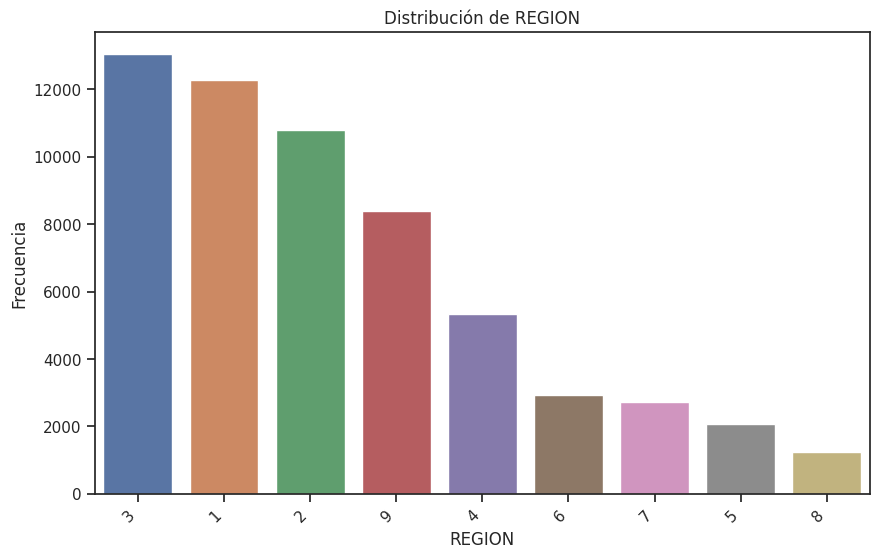

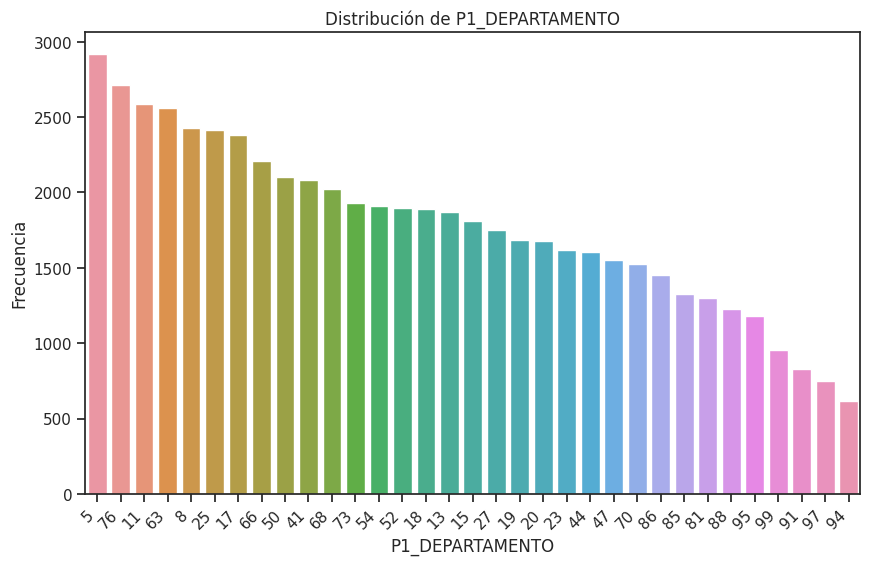

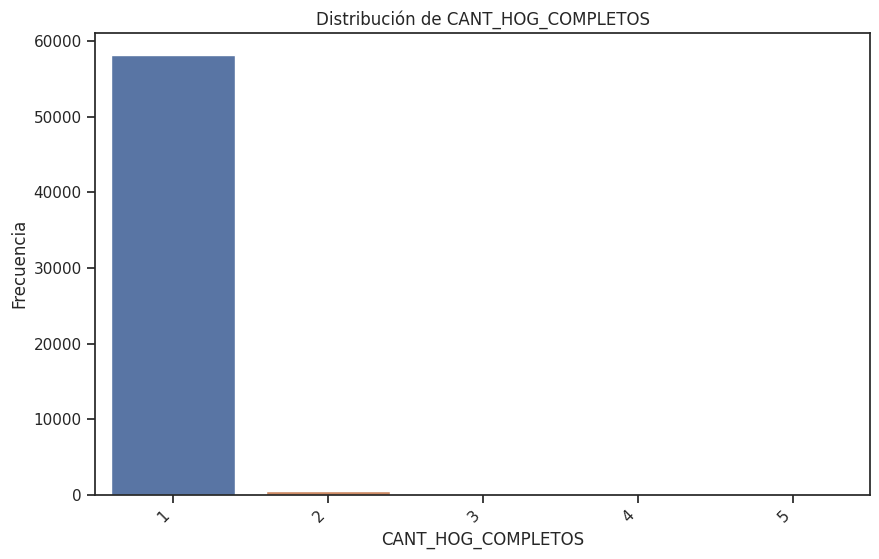

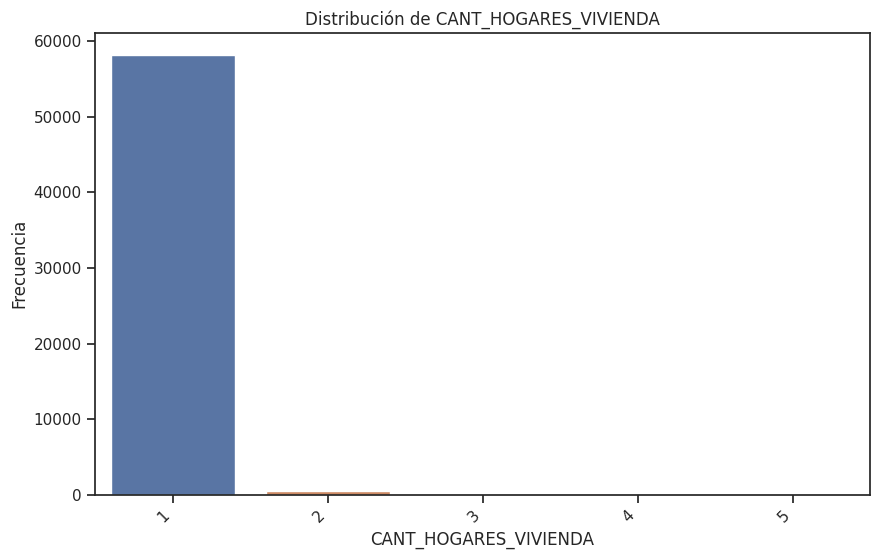

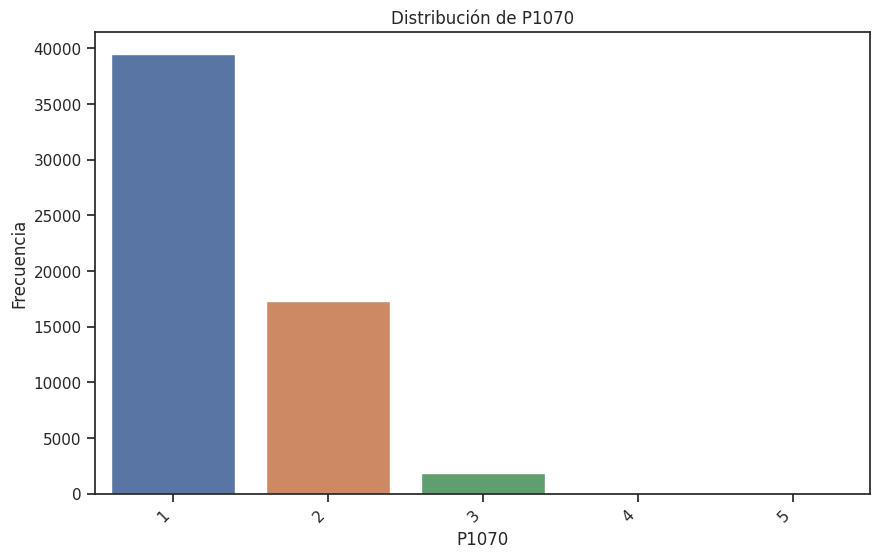

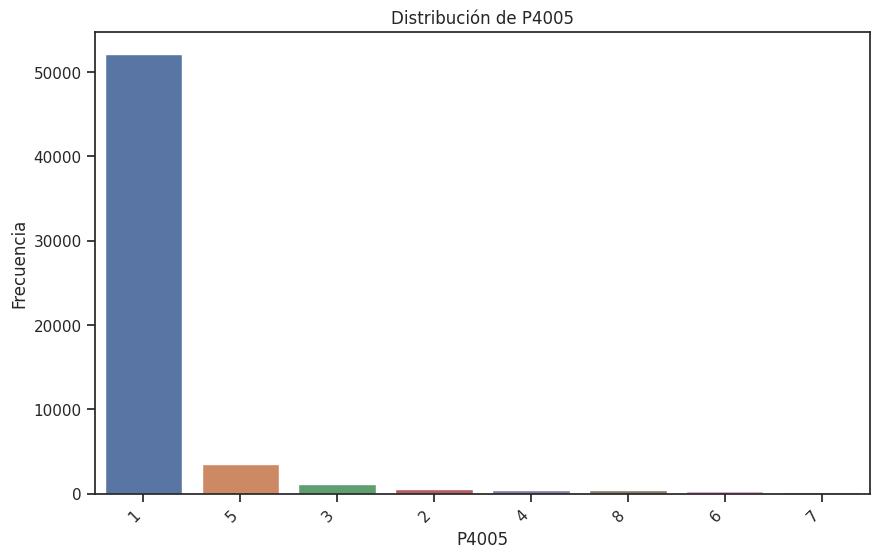

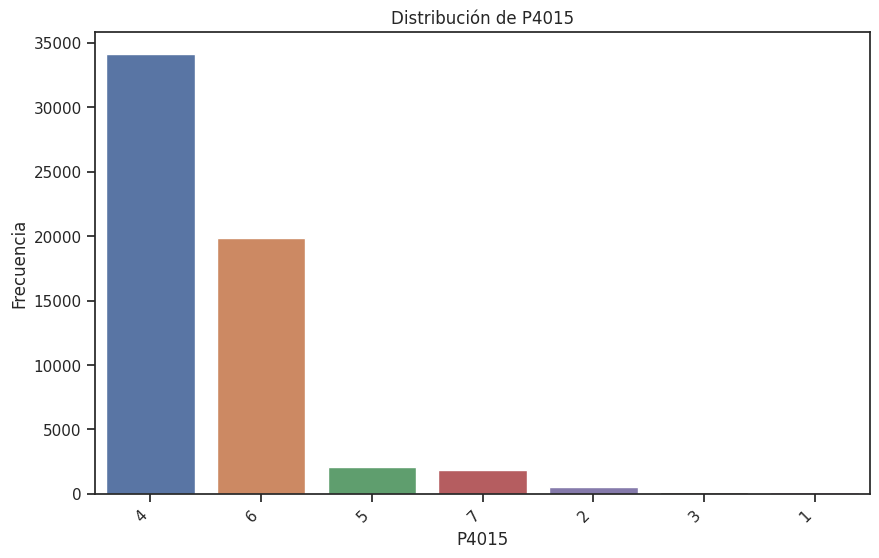

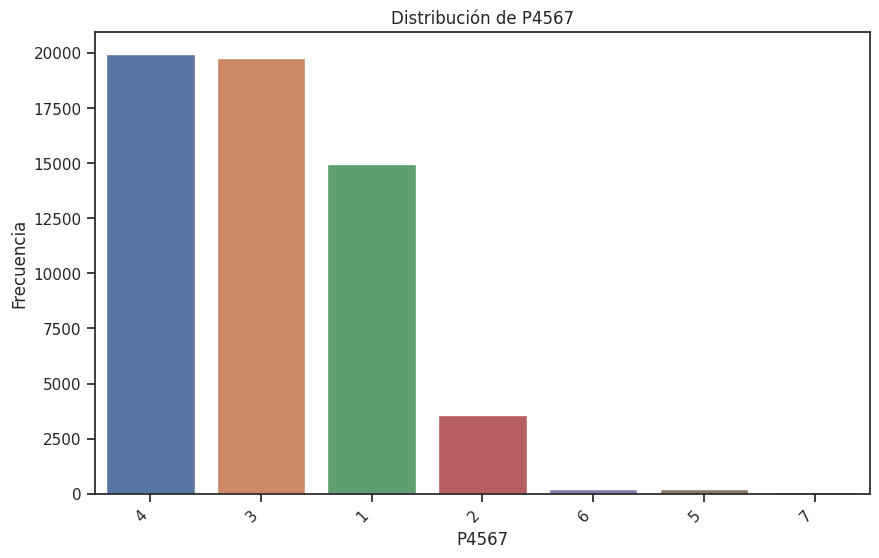

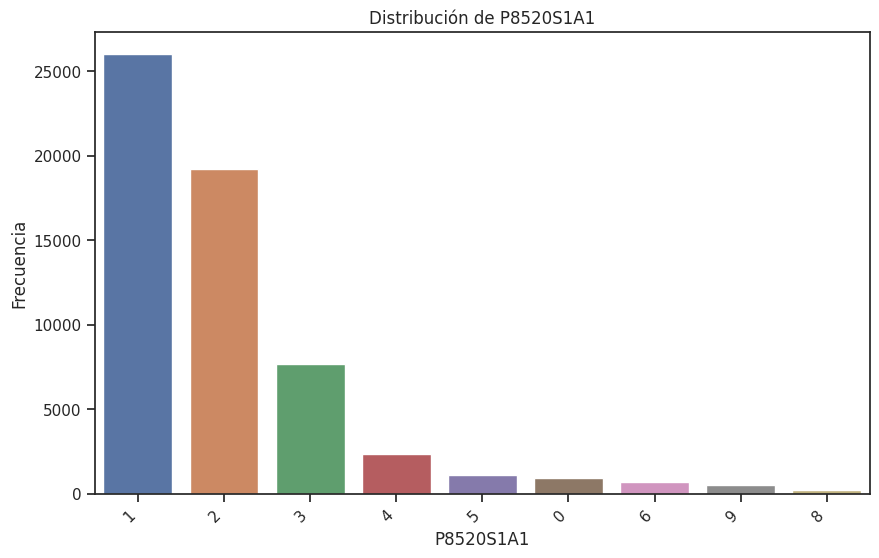

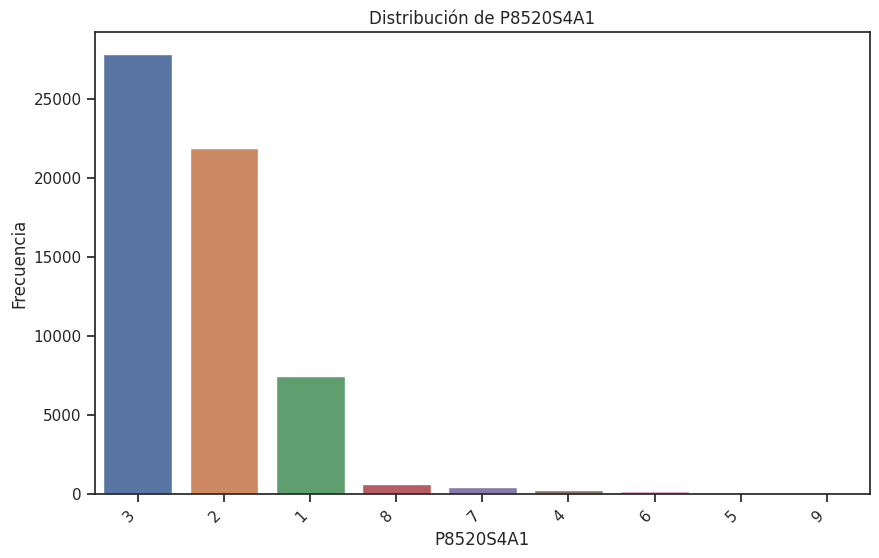

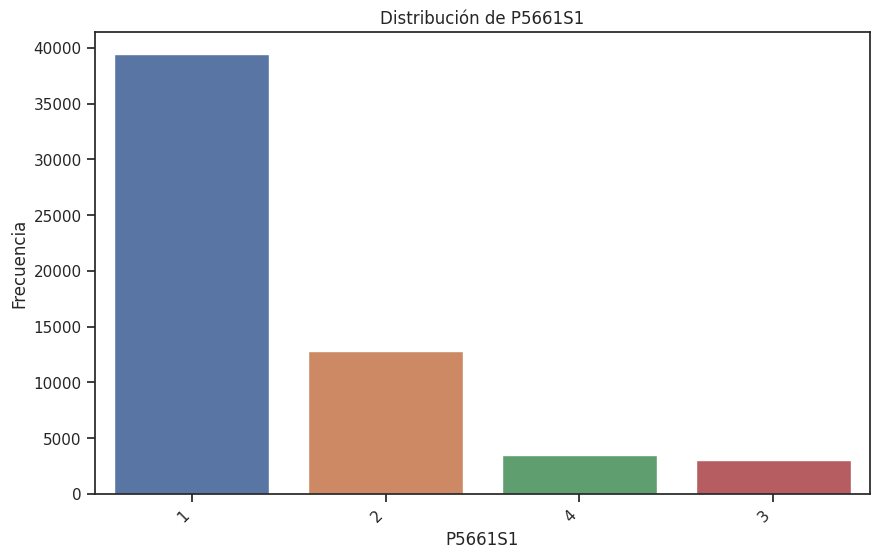

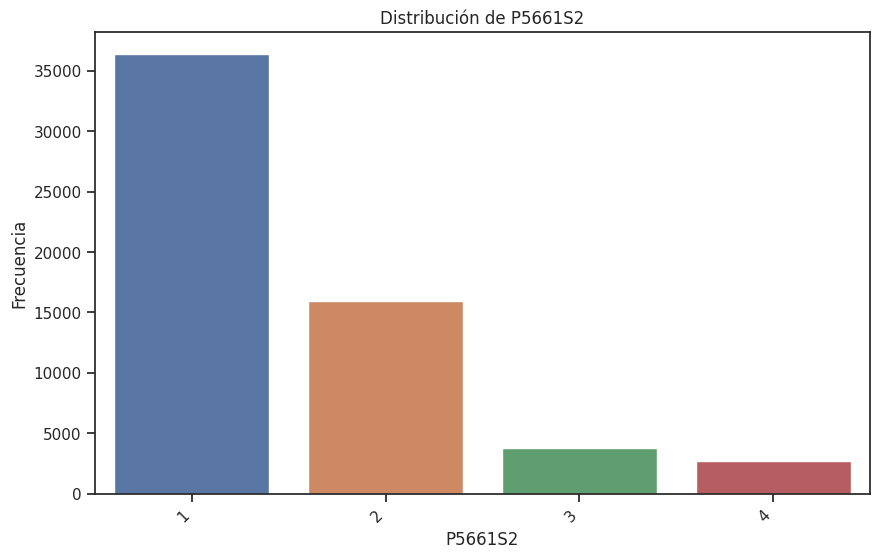

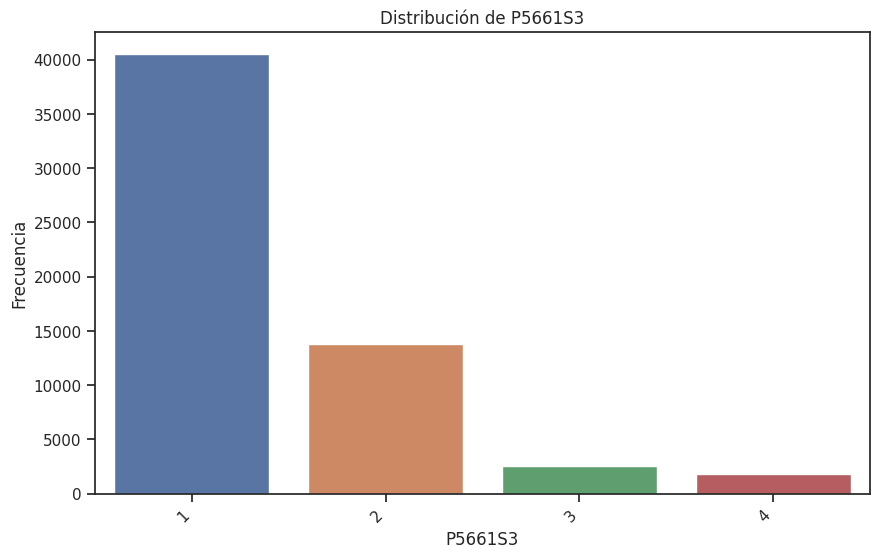

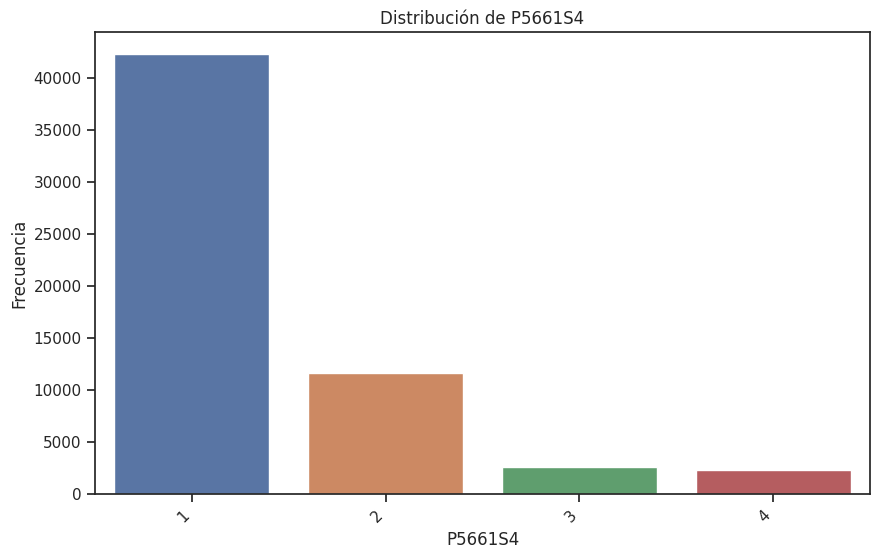

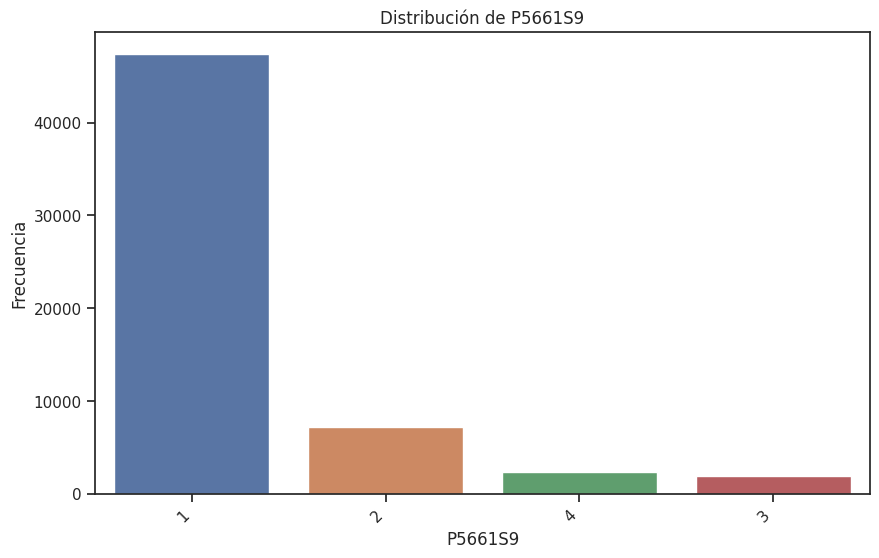

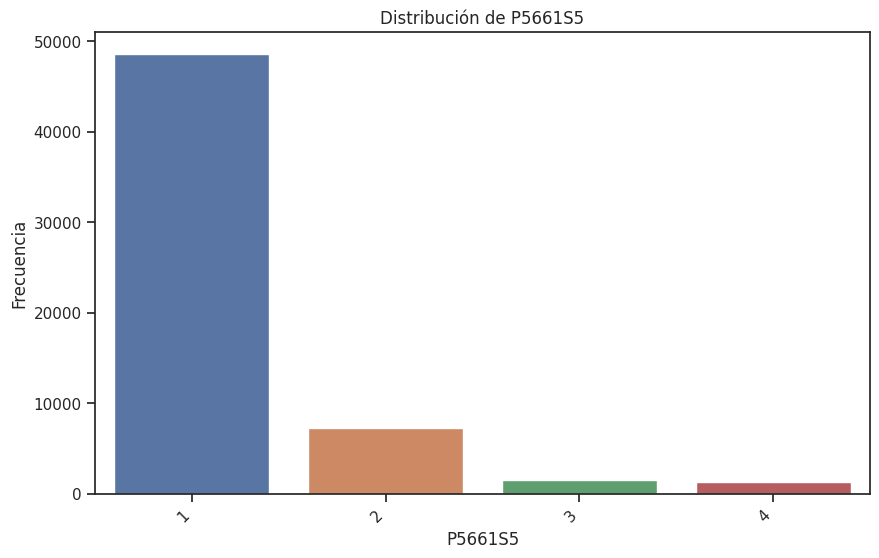

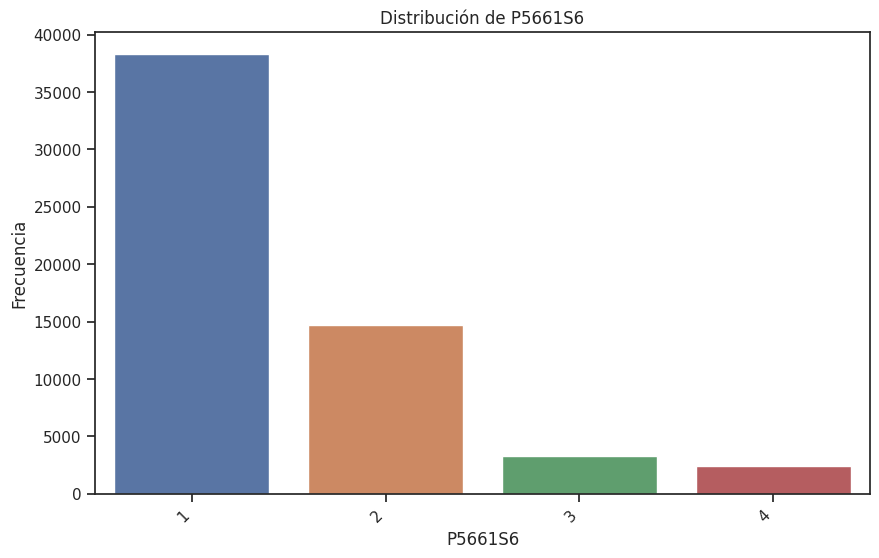

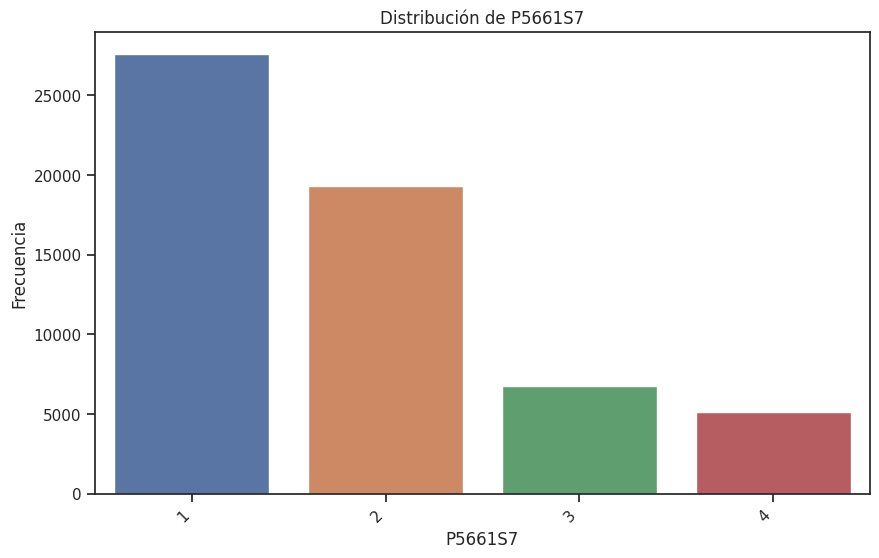

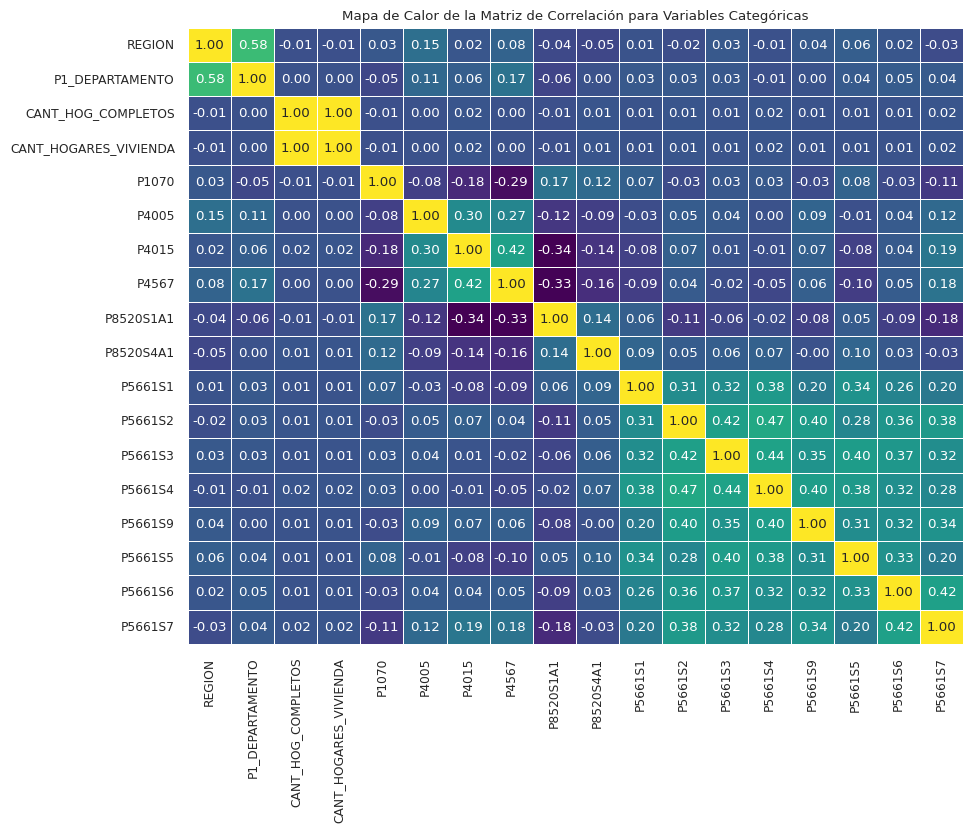

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

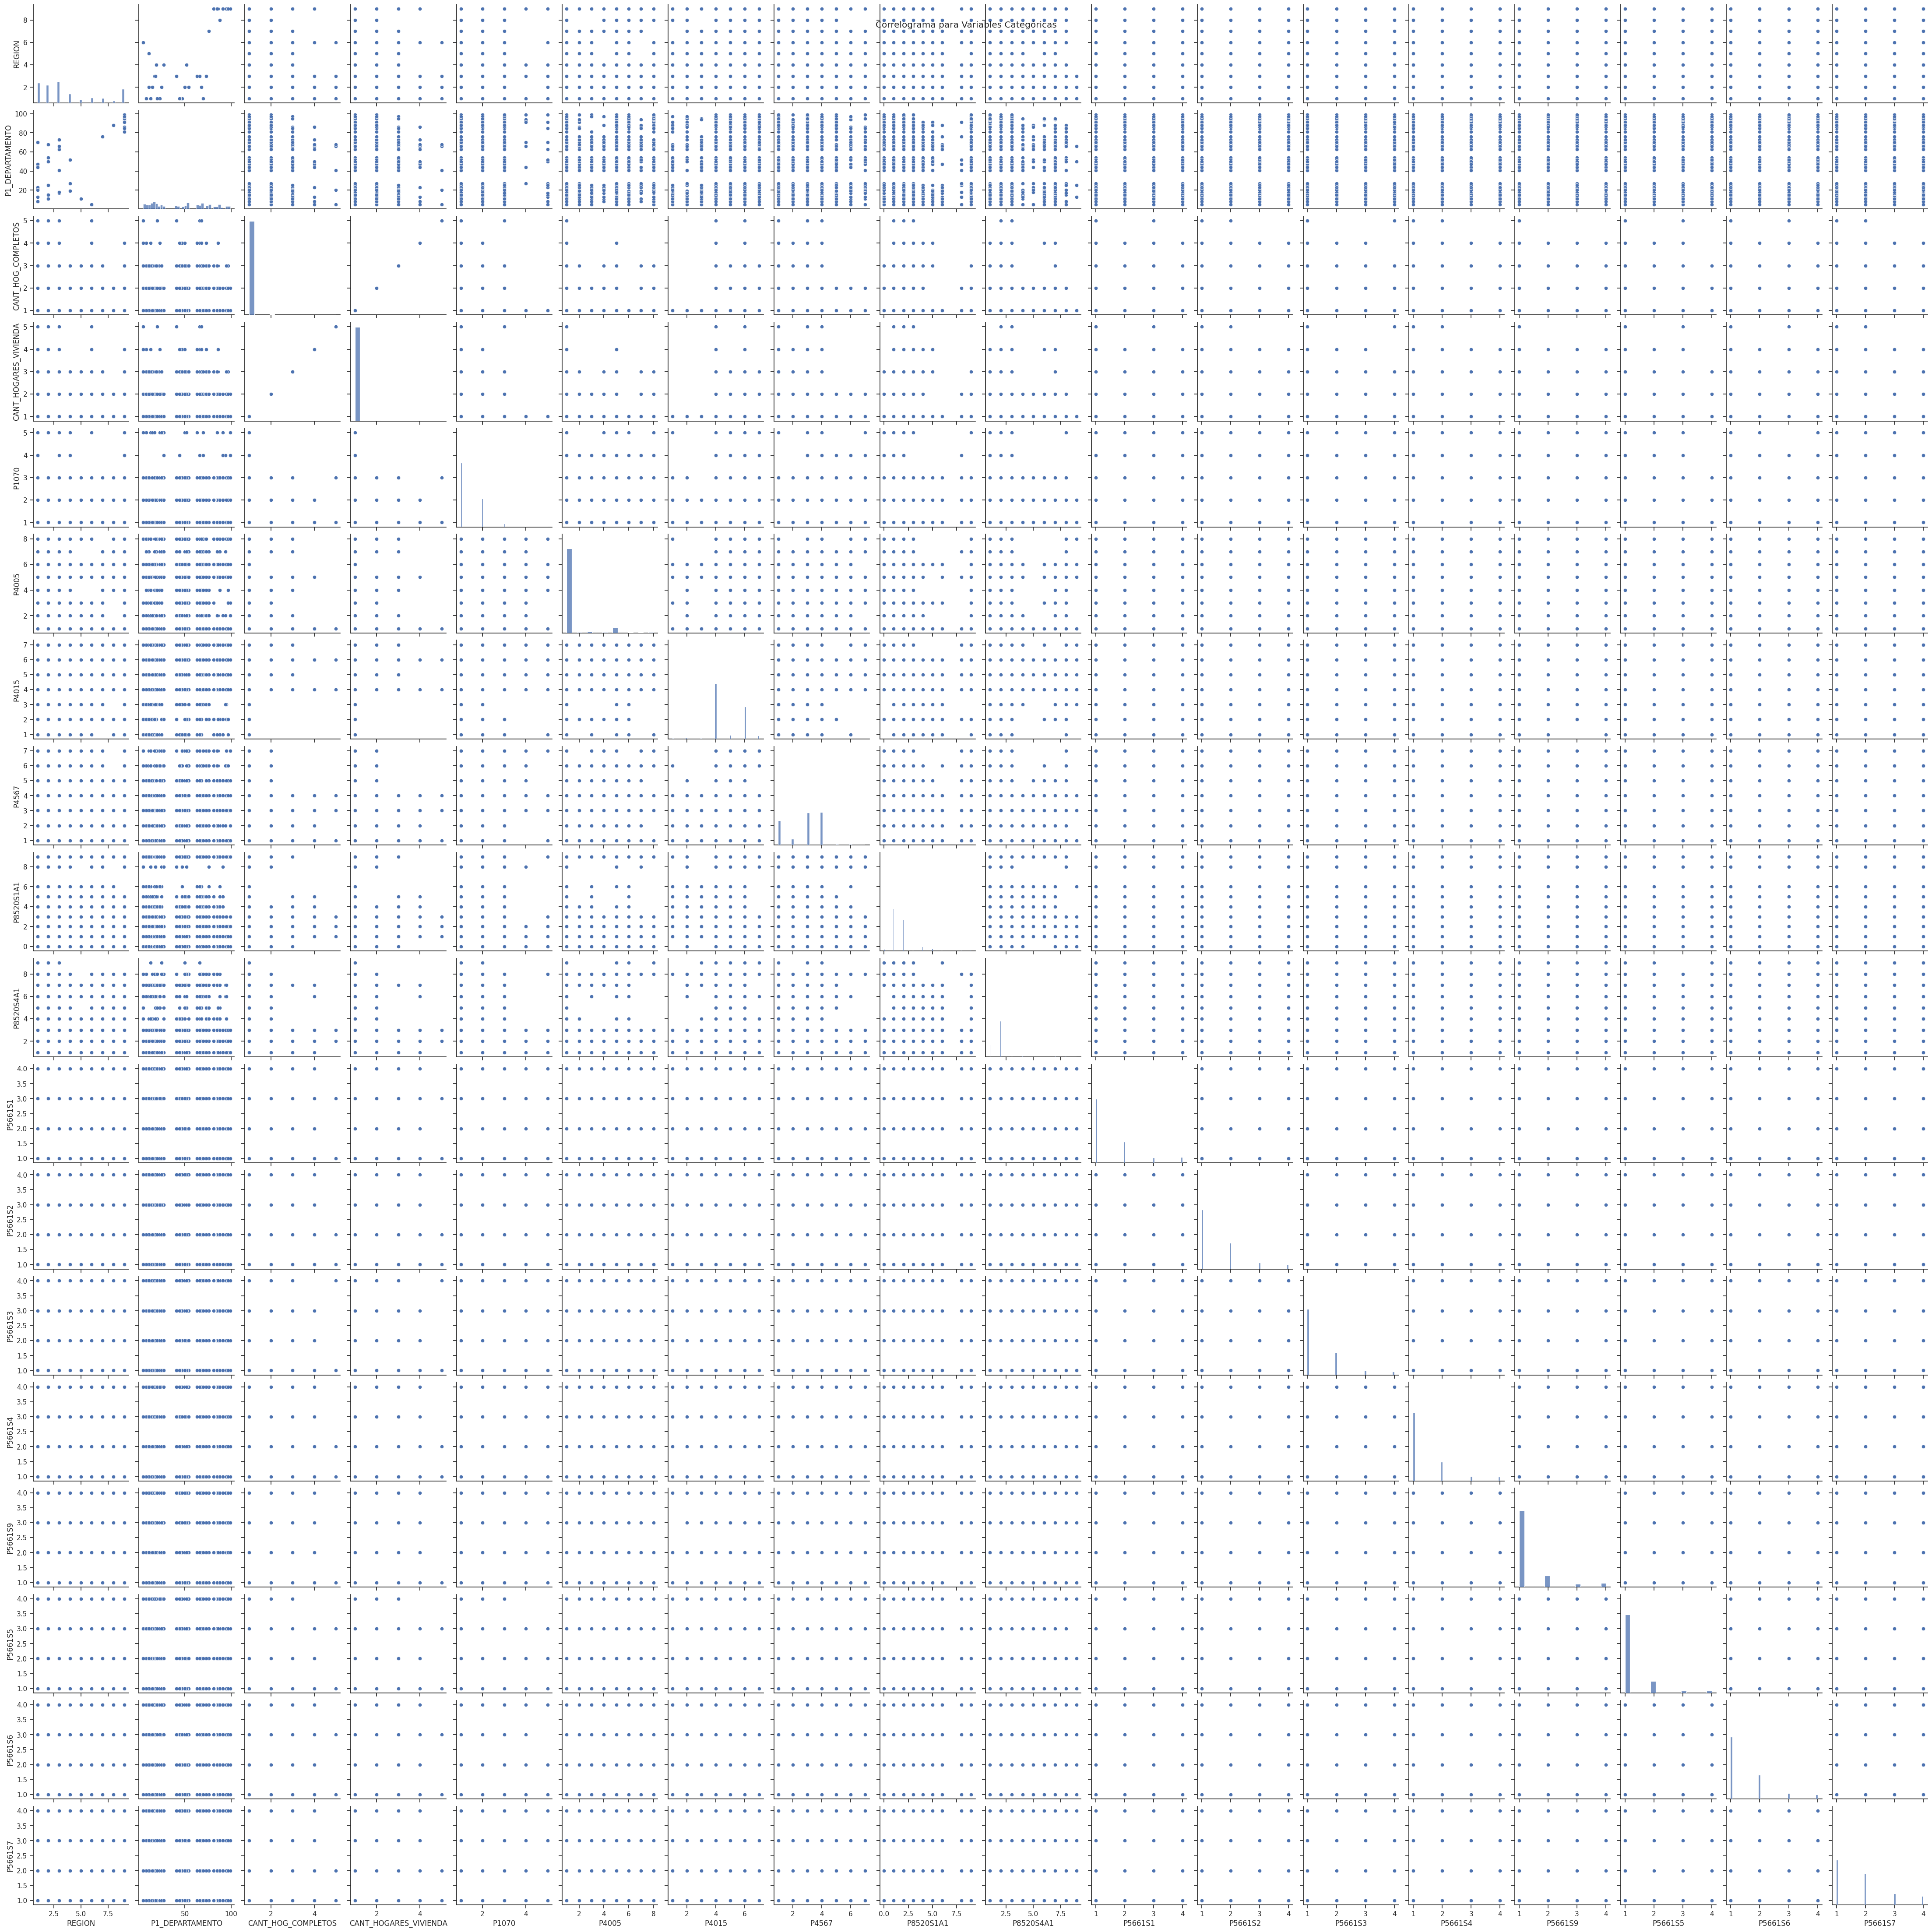

In [ ]:
# Estadísticas descriptivas para columnas categóricas
desc_stats_categoricas = df[categoricas].describe()
print("Estadísticas Descriptivas para las columnas categóricas numéricas: \n")
print(desc_stats_categoricas)

print("Gráficas para las columnas categóricas numéricas: \n")
# Gráficos para columnas categóricas
for col in categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, horizontalalignment='right')

print("\nMatriz de correlación para los datos categóricos: \n")
# Calcular la matriz de correlación
correlation_matrix = df[categoricas].corr()
print(correlation_matrix)

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Mapa de Calor de la Matriz de Correlación para Variables Categóricas')
plt.show()

# Crear un correlograma
sns.set(style="ticks")
sns.pairplot(df[categoricas], kind="scatter", palette='viridis')
plt.suptitle('Correlograma para Variables Categóricas')
plt.show()

Se analizan entonces las variables categóricas númericas, se empieza el análisis a través de analíticas descriptivas por medio del atributo “.describe()”, ya que estamos hablando de variables categóricas, a no ser que sean categóricas ordinales, hay estadísticas que no nos dirían mucho, sin embargo si existe un análisis interesante para las categóricas ordinales por ejemplo, si se analiza la variable “CANT_HOGARES_VIVIENDA” la cual es categórica ordinal, es interesante ver cómo a través de las estadísticas se puede apreciar que en promedio todas las personas encuestadas comparten su hogar con 1.0122 familias, también se aprecia una desviación para esta variable de 0.1337 lo cual nos da una idea de la dispersión de los datos alrededor de la media y nos da una idea de como parece ser que en la mayoría de hogares hay más de una familia. Para el caso de las variables categóricas sin embargo, no es muy útil el análisis ya que la categoría no representa ordinalidad, por ejemplo, la variable “P1_DEPARTAMENTO” asigna un número representativo a cada departamento, por lo cual el análisis numérico de estos elementos no es representativo.

Para puntualizar en el análisis anterior, y a través de la librería Matplotlip, se realizan gráficas de cada una de estas variables categóricas con el fin de evaluar la distribución de cada variable y su frecuencia, esto es particularmente útil para observar la distribución de los datos en las variables categóricas no ordinales ya que soporta la frecuencia y distribución de datos por cada variable, primero, puede concluirse por medio de estas que todas las clases están desbalanceadas, se observa que en la mayoría de los datos hay predominancia por una o dos de las posibles categorías.

Finalmente, se evalúa la relación lineal entre las variables categóricas a través de 3 elementos: la matriz de correlaciones, el mapa de calor y el correlograma. A través de la matriz de correlaciones, se expresa a través de una tabla la relación lineal entre los pares posibles de variables, se ve reflejado de forma gráfica en el mapa de calor el cual toma valores cercanos a amarillo a medida que va aumentando la relación lineal positiva entre los variables y a morado cuando aumenta la relación lineal negativa. En las variables, puede observarse que no hay una predominancia marcada de relaciones lineales entre las variables, sin embargo, hay algunos pares de variables con cierta predominancia a la linealidad (aunque no muy fuerte), por ejemplo se puede observar cierta tendencia a la linealidad negativa entre las variables “P8520S4A1” y “P4015” con un indicador de correlación de -0.34, se observa también cierta tendencia a correlación lineal positiva entre por ejemplo las variables “P5661S4” y “P5661S2” con un índice de correlación de 0.47. Se realiza también un análisis de correlogramas el cual no dice tanto como las gráficas y tabla de correlaciones mencionadas con anterioridad, no se observan patrones muy claros de tendencia lineal entre las variables, además al ser variables discretas categóricas no es visualmente tan representativo.

No se realiza análisis de la variable de texto ya que es una y sus estadísticas descriptivas no arrojan resultados o elementos relevantes para el estudio.


<ipython-input-7-720336d17122>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


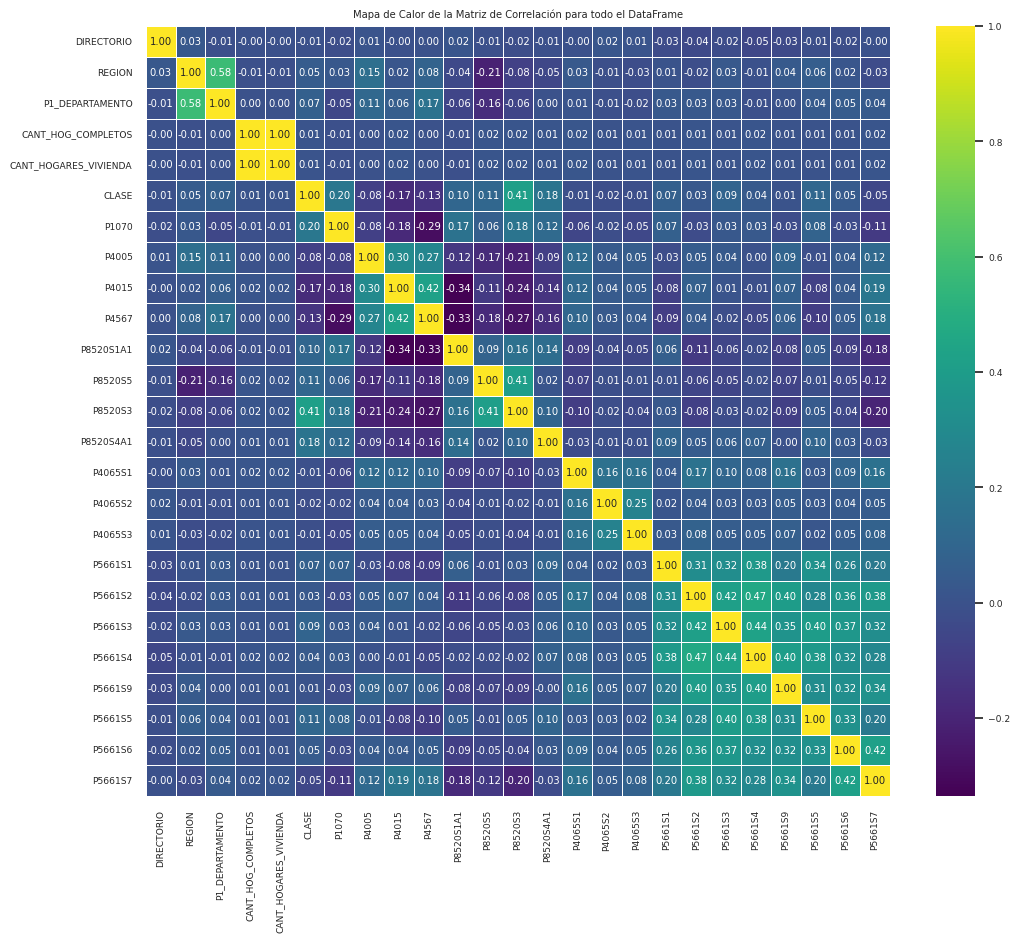

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor optimizado
plt.figure(figsize=(12, 10))  # Aumentar el tamaño de la figura
sns.set(font_scale=0.6)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", cbar=True)
plt.title('Mapa de Calor de la Matriz de Correlación para todo el DataFrame')

plt.show()

Se realiza un último gráfico que agrupa todas las variables, se hace un mapa de calor que permite identificar relaciones lineales entre los pares de variables, no se encuentran grandes hallazgos con respecto al análisis hecho con anterioridad, se evidencias algunas relaciones débiles de relación lineal, por ejemplo, se observa un indicio de relación lineal negativa entre “P8520S1A1” y “P4015” con un coeficiente de correlación de -0.34, se evidencia también indicios de correlación positiva entre algunos pares de variables, por ejemplo entre “P5661S4” y “P5661S2” se evidencia un indicio de correlación positiva con un índice de 0.47. Es interesante resaltar como la variable de tipo texto no representa ningún tipo de relación lineal con las otras variables.

count    58772.000000
mean       219.401925
std        347.148241
min          0.530119
25%         40.447321
50%        105.223531
75%        229.233206
max       6771.112786
Name: FEX_C, dtype: float64


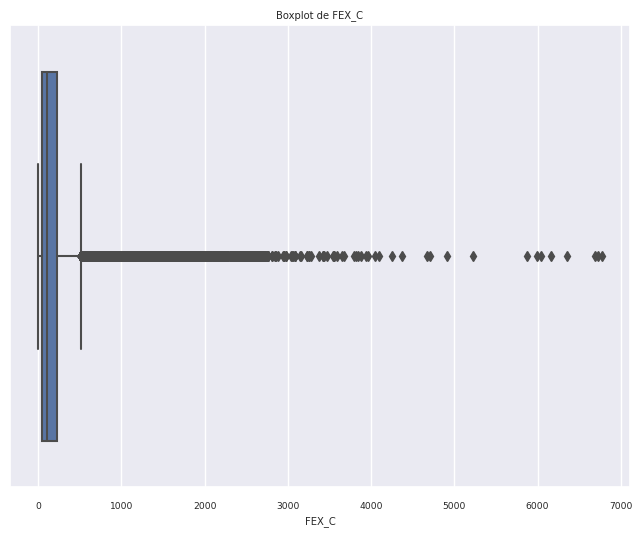

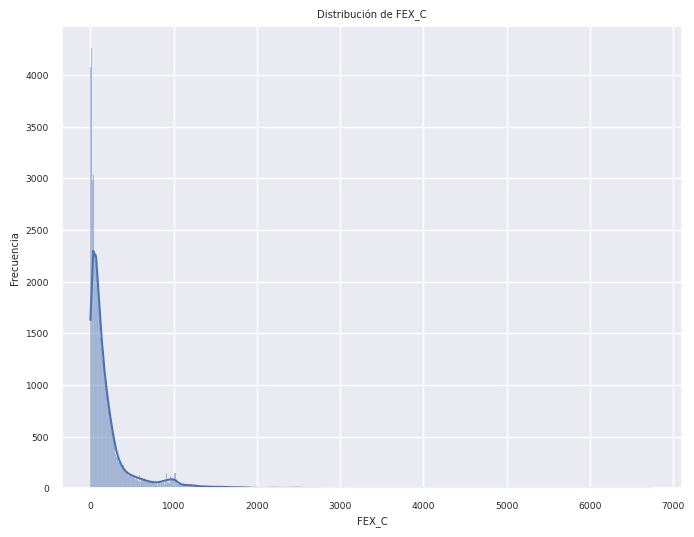

In [ ]:
# Reemplaza las comas por puntos en la columna FEX_C
df['FEX_C'] = df['FEX_C'].str.replace(',', '.')
# Convierte la columna FEX_C de str a float
df['FEX_C'] = df['FEX_C'].astype(float)
# Estadísticas descriptivas
descripcion = df['FEX_C'].describe()
print(descripcion)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['FEX_C'])
plt.title('Boxplot de FEX_C')
plt.show()


# Gráfico de distribución
plt.figure(figsize=(8, 6))
sns.histplot(df['FEX_C'], kde=True)
plt.title('Distribución de FEX_C')
plt.xlabel('FEX_C')
plt.ylabel('Frecuencia')
plt.show()

Al analizar detalladamente la variable FEX_C, se pudo detectar que esta tenía un formato incorrecto, ya que estaba en formato de texto pero contenía números, sin embargo, no se dejaba transformar a decimal por medio de la función float () ya que tenía comas en lugar de puntos, se procede entonces a cambiar las comas por puntos, luego se hace un análisis estadístico descriptivo básico de la variable, se puede notar que la media es 224.64 sin embargo, la desviación estándar es de 320.46 lo cual de entrada nos da un indicador de la alta variabilidad que puede tener esta variable con respecto a la media, también, se puede observar que el valor mínimo es 1.289 mientras que el valor máximo para esta variable es 2,751.78, además de esto las estadísticas descriptivas de Python nos muestran los cuartiles del 25%, 50% y 75% con los valores de 46.86, 115.04, 240.57 respectivamente lo cual nos da una idea de la distribución de los datos.

Con el fin de apoyar los análisis estadísticos de esta variable, se realiza primero in gráfico de boxplot el cual presenta de forma especial los cuartiles mencionados anteriormente, se puede observar que los datos están muy concentrados hacia la izquierda lo cual, genera un alto número de outlyers por fuera del rango Inter cuartil, por lo cual se concluye que es una variable que podría interferir un poco en análisis posteriores, finalmente se realiza un gráfico para evaluar la distribución y se observa que esta es asimétrica con la mayoría de sus datos hacia la izquierda.


In [ ]:
# Crea un diccionario que mapea los valores de la columna REGION a coordenadas
coordinates = {
    1: (10.541691589391467, -74.04910196308987),
    2: (6.013057006180515, -70.42052045640392),
    3: (4.560299186157048, -73.68705309259512),
    4: (4.496053359561176, -77.26857588665754),
    5: (4.710665553010074, -74.07205239183722),
    6: (6.765389419581694, -75.60962584197226),
    7: (3.6849747458861213, -76.4731746308807),
    8: (12.542406079262099, -81.71833566758795),
    9: (-1.0154505162569214, -70.97880897480178),
}

# Crea las columnas de latitud y longitud
df["latitude"] = [coordinates[region][0] for region in df["REGION"].values]
df["longitude"] = [coordinates[region][1] for region in df["REGION"].values]

# Crea el dataframe geodf
geodf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"],df["latitude"]))
geodf.head()

,DIRECTORIO,REGION,P1_DEPARTAMENTO,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,...,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7,FEX_C,latitude,longitude,geometry
0,7120001,1,13,1,1,1,2,1,4,3,...,1,1,1,1,1,1,208.349137,10.541692,-74.049102,POINT (-74.04910 10.54169)
1,7120002,1,13,1,1,1,1,1,4,3,...,1,2,1,1,1,3,306.477352,10.541692,-74.049102,POINT (-74.04910 10.54169)
2,7120005,1,13,1,1,1,1,1,4,3,...,1,1,1,1,1,1,175.390717,10.541692,-74.049102,POINT (-74.04910 10.54169)
3,7120006,1,13,1,1,1,2,1,4,3,...,1,1,1,1,1,2,187.543507,10.541692,-74.049102,POINT (-74.04910 10.54169)
4,7120007,1,13,1,1,1,2,1,4,3,...,1,1,1,1,3,2,384.099293,10.541692,-74.049102,POINT (-74.04910 10.54169)


In [ ]:
# Crear un mapa centrado en Colombia
m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)  # Coordenadas centradas en Colombia

# Convertir los puntos de geodf a una lista de coordenadas
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geodf['geometry']]

# Añadir un mapa de calor de densidad de puntos con un radio grande y un alto valor de blur
HeatMap(heat_data, radius=60, blur=50).add_to(m)

# Mostrar el mapa
m.save('heatmap_colombia.html')  # Guardar el mapa en un archivo HTML
m

NameError: ignored

Con el fin de visualizar un poco la geografía de la distribución de datos, por medio de la librería “geopandas”, se procede a crear un nuevo dataframe de geopandas llamado “geodf”el cual no es más que una copia del dataframe original pero en formato de geopandas, adicional a esto se crea la columna de geometría para este dataframe a través de puntos con la latitud y longitud de las regiones del país, para poder lograr esto se hizo de forma manual un mapeo de las 9 regiones exploradas en la encuesta del DANE.

Se imprime el dataframe resultante, y luego, mediante el uso de la librería folium se crea un mapa de calor sobre un mapa interactivo de Colombia, esta gráficanos permite ver como la mayoría de encuestas se realizaron en la zona centro/capital del país, seguido por la región caribe y luego el pacífico. EL mapa de calor se guarda en un archivo HTML.


In [ ]:
# Mapeo de nombres de regiones
region_names = {
    1: 'Caribe',
    2: 'Oriental',
    3: 'Central',
    4: 'Pacífica (sin Valle)',
    5: 'Bogotá',
    6: 'Antioquia',
    7: 'Valle del Cauca',
    8: 'San Andrés',
    9: 'Orinoquía - Amazonía',
}

# Crear un gráfico de barras interactivo
def create_interactive_bar_chart(region, service):
    filtered_df = df[(df['REGION'] == region) & (df[service] == 1)]
    count = len(filtered_df)
    fig = px.bar(x=['Hogares sin Servicio', 'Hogares con Servicio'],
                 y=[count, len(df) - count],
                 labels={'x': 'Estado del Servicio', 'y': 'Cantidad de Hogares'},
                 title=f'Estado del Servicio en la Región {region_names[region]}',
                 template='plotly',
                 color_discrete_sequence=['#636EFA'])
    fig.show()

# Crear el menú desplegable interactivo para la región
region_dropdown = widgets.Dropdown(
    options=[(region_names[region], region) for region in region_names.keys()],
    description='Región:',
    disabled=False,
)

# Crear el menú desplegable interactivo para la variable
service_dropdown = widgets.Dropdown(
    options={'Acueducto': 'P8520S5', 'Alcantarillado': 'P8520S3'},
    description='Variable:',
    disabled=False,
)

# Definir la función de actualización cuando se cambia la región o la variable
def on_dropdown_change(change):
    create_interactive_bar_chart(region_dropdown.value, service_dropdown.value)

region_dropdown.observe(on_dropdown_change, names='value')
service_dropdown.observe(on_dropdown_change, names='value')

# Mostrar la gráfica inicial
create_interactive_bar_chart(list(region_names.keys())[0], 'P8520S5')

# Mostrar los menús desplegables
display(region_dropdown)
display(service_dropdown)

Dropdown(description='Región:', options=(('Caribe', 1), ('Oriental', 2), ('Central', 3), ('Pacífica (sin Valle…

Dropdown(description='Variable:', options={'Acueducto': 'P8520S5', 'Alcantarillado': 'P8520S3'}, value='P8520S…

In [ ]:
#Gráfica interactiva solo para máquina física (no funciona en Google Colal)

# Mapeo de nombres de regiones
region_names = {
    1: 'Caribe',
    2: 'Oriental',
    3: 'Central',
    4: 'Pacífica (sin Valle)',
    5: 'Bogotá',
    6: 'Antioquia',
    7: 'Valle del Cauca',
    8: 'San Andrés',
    9: 'Orinoquía - Amazonía',
}

# Crear un gráfico de barras interactivo
def create_interactive_bar_chart(region, service):
    filtered_df = df[(df['REGION'] == region) & (df[service] == 1)]
    count = len(filtered_df)
    fig = px.bar(x=['Hogares con Servicio', 'Hogares sin Servicio'],
                 y=[count, len(df) - count],
                 labels={'x': 'Estado del Servicio', 'y': 'Cantidad de Hogares'},
                 title=f'Estado del Servicio en la Región {region_names[region]}',
                 template='plotly',
                 color_discrete_sequence=['#636EFA'])
    fig.show()

# Crear el menú desplegable interactivo para la región
region_dropdown = widgets.Dropdown(
    options=[(region_names[region], region) for region in region_names.keys()],
    description='Región:',
    disabled=False,
)

# Crear el menú desplegable interactivo para la variable
service_dropdown = widgets.Dropdown(
    options={'Acueducto': 'P8520S5', 'Alcantarillado': 'P8520S4A1', 'Basura en la calle': 'P5661S3'},
    description='Variable:',
    disabled=False,
)

# Definir la función de actualización cuando se cambia la región o la variable
def on_dropdown_change(region, service):
    create_interactive_bar_chart(region, service)

# Crear un widget interactivo que se actualiza automáticamente
interactive_plot = interactive(on_dropdown_change, region=region_dropdown, service=service_dropdown)

# Mostrar los menús desplegables y la gráfica interactiva
display(interactive_plot)


#NO FUNCIONA EN COLAB PERO SI EN MÁQUINA

interactive(children=(Dropdown(description='Región:', options=(('Caribe', 1), ('Oriental', 2), ('Central', 3),…

Luego, con el fin de profundizar un poco más los insights de los hallazgos encontrados hasta ahora, se crea a través de la librería plotly un gráfico dinámico para las variables binarias de Acueducto y Alcantarillado a través de las diferentes regiones, esto con el fin de que de una forma interactiva, se puedan realizar comparativas de los servicios en las diferentes regiones.

Al utilizar la herramienta se pueden observar y generar algunas conclusiones interesantes, como que por ejemplo, si bien la región caribe de Colombia es más grande y con mayores recursos económicos que el Amazonas, este último tiene un mejor servicio de acueducto que se refleja en menos hogares con carencia de este: 2245 vs 4716. También se analiza por ejemplo el ejercicio de comparar el alcantarillado de Antioquia con el de la región Oriental del país y se puede observar como Antioquia supera a la región Oriental en un mejor sistema de alcantarillado, este se ve reflejado en 1033 hogares sin servicio en Antioquia vs 3416 hogares sin servicio en la región Oriental.

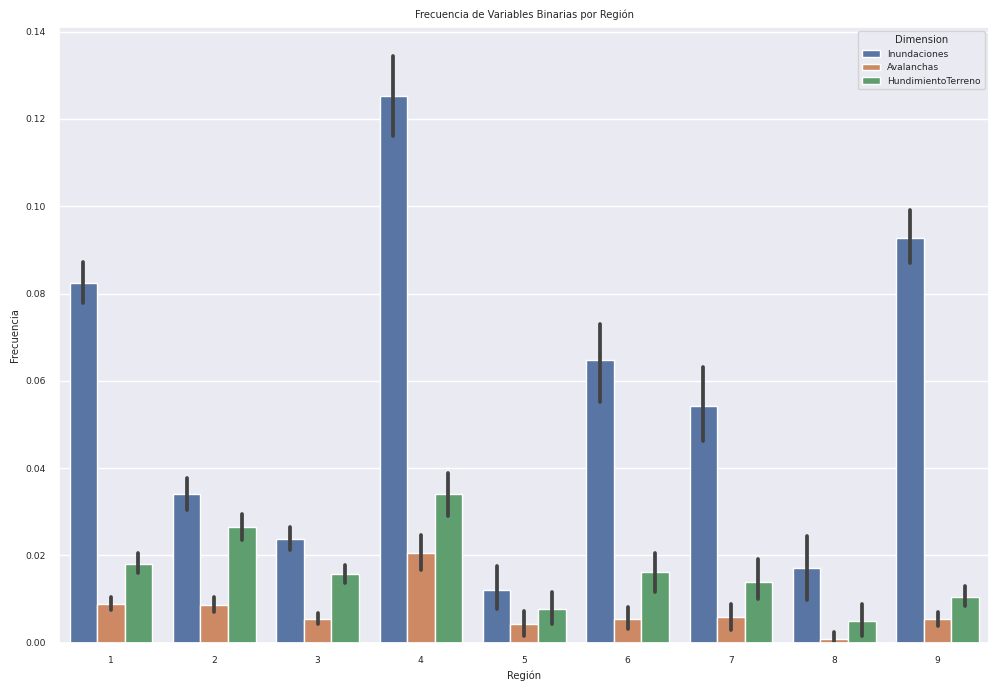

In [ ]:
# Seleccionar las columnas de interés
columnas_binarias = ['P4065S1', 'P4065S2', 'P4065S3', 'REGION']

# Crear un nuevo DataFrame df2 con las columnas de interés
df2 = df[columnas_binarias]

# Renombrar las columnas para mayor claridad
df2.columns = [ 'Inundaciones', 'Avalanchas', 'HundimientoTerreno', 'REGION']

# Crear un DataFrame largo con una columna para la dimensión y otra para la región
df_long = pd.melt(df2, id_vars=['REGION'], var_name='Dimension', value_name='Frecuencia')

# Generar un gráfico de barras apilado
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x='REGION', y='Frecuencia', hue='Dimension')
plt.title('Frecuencia de Variables Binarias por Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x para mayor claridad
plt.legend(title='Dimension')
plt.show()



Luego, mediante un gráfico de barras apiladas, se hace un análisis de la ocurrencia de desastres naturales en las diferentes regiones, en el eje y se colocan las 9 regiones del país que presentaron la encuesta y en el eje y, la frecuencia de ocurrencia de 3 variables binarias: inundaciones, avalanchas y hundimiento de terreno.

 Es interesante analizar como en todas las regiones existe una prevalencia de las inundaciones por encima a otro tipo de desastres naturales, también, en la región 9 (Orinoquía - Amazonía) es la zona del país donde más se presentan inundaciones, siendo la región 5 (Bogotá), la región donde menos se presentan. También, se puede observar como la presencia de avalanchas por ejemplo es casi mínima en Bogotá mientras que en el Caribe y en Antioquia son más presentes estas que en el resto del país. Finalmente, con respecto al hundimiento de terreno, puede apreciarse que este se da más en la región del Pacífico y se da en menor medida en San Andrés.


In [ ]:
df = df.drop(columns=["latitude","longitude", "FEX_C", "P1_DEPARTAMENTO", "DIRECTORIO"])
df

,REGION,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,P8520S1A1,P8520S5,...,P4065S2,P4065S3,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7
0,1,1,1,1,2,1,4,3,3,1,...,0,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,4,3,2,1,...,0,1,3,4,1,2,1,1,1,3
2,1,1,1,1,1,1,4,3,3,1,...,0,1,1,1,1,1,1,1,1,1
3,1,1,1,1,2,1,4,3,3,1,...,0,0,3,2,1,1,1,1,1,2
4,1,1,1,1,2,1,4,3,2,1,...,0,0,1,2,1,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93155,1,1,1,1,3,1,7,4,1,1,...,0,0,1,2,2,1,2,1,1,2
93156,1,1,1,1,2,1,6,3,1,1,...,0,0,2,2,2,1,1,2,2,3
93157,1,1,1,1,2,1,6,3,1,1,...,0,0,2,2,2,1,1,1,1,2
93159,4,1,1,1,2,1,4,4,1,0,...,0,0,1,1,1,4,1,1,1,1


In [ ]:
for column in df.columns:
    print(f"\nTítulo de la columna: {column}")
    unique_values = df[column].unique()
    print(f"\nValores únicos: {unique_values}")
    print("=" * 30)


Título de la columna: REGION

Valores únicos: [1 2 4 9 5 3 7 6 8]

Título de la columna: CANT_HOG_COMPLETOS

Valores únicos: [1 2 3 4 5]

Título de la columna: CANT_HOGARES_VIVIENDA

Valores únicos: [1 2 3 4 5]

Título de la columna: CLASE

Valores únicos: [1 0]

Título de la columna: P1070

Valores únicos: [2 1 3 4 5]

Título de la columna: P4005

Valores únicos: [1 2 5 8 4 3 7 6]

Título de la columna: P4015

Valores únicos: [4 6 5 2 7 3 1]

Título de la columna: P4567

Valores únicos: [3 1 4 2 6 5 7]

Título de la columna: P8520S1A1

Valores únicos: [3 2 9 4 0 1 6 5 8]

Título de la columna: P8520S5

Valores únicos: [1 0]

Título de la columna: P8520S3

Valores únicos: [1 0]

Título de la columna: P8520S4A1

Valores únicos: [3 7 2 1 5 6 4 8 9]

Título de la columna: P4065S1

Valores únicos: [0 1]

Título de la columna: P4065S2

Valores únicos: [0 1]

Título de la columna: P4065S3

Valores únicos: [0 1]

Título de la columna: P5661S1

Valores únicos: [1 3 2 4]

Título de la columna:

Se proceden a eliminar las siguientes columnas: "latitude","longitude", "FEX_C", "P1_DEPARTAMENTO", "DIRECTORIO" ya que como puede concluirse de análisis anteriores, no aportan a nuestro dataframe y en cambio tienen elementos que pueden entorpecer el análisis no supervisado a realizar. Finalmente, se imprimen los valores únicos con el fin de hacer una última verificación de los rangos de variables antes de proceder al análisis no supervisado.

**Aprendizaje no supervisado**

Ya que tenemos dataset de variables categoricas y dummy no se recomienda hacer uso de PCA ya que este se usa para variables continuas, se busca entonces reducir la dimensionalidad a través de una matriz truncada por medio de descomposición en valores singulares.

In [ ]:
# Se estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Se aplica Truncated SVD
n_components = 18  # Número de componentes a retener
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)

# Se obtienen las componentes principales y la varianza explicada
explained_variance = svd.explained_variance_
explained_variance_ratio = svd.explained_variance_ratio_

# Mostrar la varianza explicada
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Porcentaje de varianza explicada: {explained_variance_ratio.sum() * 100}%")


Varianza explicada por cada componente: [3.53643101 2.73614957 2.00294998 1.34893836 1.25736301 1.17670075
 0.95677374 0.88094328 0.86789439 0.83224206 0.78561425 0.7518703
 0.74332554 0.70345844 0.66482661 0.62607292 0.59632648 0.5413373 ]
Porcentaje de varianza explicada: 91.34442601451975%


In [ ]:
# Crear un DataFrame con los componentes
column_names = [f"Componente_{i+1}" for i in range(X_svd.shape[1])]
df_components = pd.DataFrame(data=X_svd, columns=column_names)

# Imprimir el DataFrame
df_components

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,Componente_11,Componente_12,Componente_13,Componente_14,Componente_15,Componente_16,Componente_17,Componente_18
0,-2.000394,-1.116554,-0.066106,0.311999,0.075783,0.007210,0.671111,0.585872,0.227977,-0.255352,0.317894,0.009776,0.142523,-0.457840,0.390513,-0.381646,0.018222,0.740860
1,2.018109,-0.692667,0.022342,4.222054,1.206870,1.759718,0.853538,-1.784234,0.867788,0.524236,-0.120422,-5.684486,0.620741,-0.432823,-1.720559,-0.428427,-0.232321,0.212696
2,-1.283994,-0.214046,0.103588,4.145206,2.064403,1.469516,0.522239,-1.984299,0.858135,0.856497,1.045406,-4.891851,1.472476,0.501542,0.780192,-0.590753,0.050467,0.423631
3,-0.547474,-1.560345,-0.121690,0.200569,-0.159473,0.308479,0.773708,0.604171,0.553622,-0.027555,-0.219338,-0.481822,-1.226024,-0.880221,-0.891477,-0.769385,-0.394235,0.231017
4,-0.224304,-1.031879,-0.111217,0.496881,-0.609186,-0.264976,0.907108,0.190802,-0.411874,-1.088201,1.516947,0.061263,-0.490616,0.257552,-0.408806,0.190505,-0.272426,1.592891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58767,1.153642,1.345789,-0.001089,1.321231,0.977427,-0.732722,1.629839,3.863135,-1.100001,-1.969148,-1.312190,0.146834,-0.378078,0.407002,1.300124,-1.256600,1.238791,0.255198
58768,1.273782,-0.689432,-0.112640,0.456093,-0.960415,-0.857215,0.970092,0.154896,0.837753,-1.289711,0.405733,0.015206,-1.131956,0.320526,0.699209,-0.273743,0.433358,-0.472189
58769,0.001118,-0.361160,-0.050422,0.604218,-0.767289,-0.773828,1.070389,0.553504,0.821087,-1.175719,-0.656565,-0.303625,-0.540995,-0.489349,-0.001433,-0.002241,0.660379,-0.518372
58770,0.328777,0.704357,-0.287523,-1.911245,1.536456,0.741527,1.030790,-0.417162,-0.032865,-1.546278,-1.482136,-0.475259,0.823128,-1.951525,0.551263,-0.188664,-0.407354,1.629777


Primero se procede a realizar un análisis de descomposición en valores singulares, esto con el fin de estudiar y determinar si es posible explicar las 23 dimensiones en menos dimensiones a través de una matriz truncada sin perder tanta información.
Se escalan los datos y se trunca la matriz de datos originales a través de la función “TruncatedSVD” de la librería “sklearn.decomposition”, el objetivo es conservar al menos el 90% de la variabilidad de los datos.

Luego de hacer varias iteraciones con diferentes números de componentes, se encuentra que el número óptimo de componentes a retener es de 18, estos pueden explicar el 91.32% de la varianza, infortunadamente los resultados no son los esperados ya que se pretendía crear un índice de una dimensión que pudiese explicar la calidad de los hogares de Colombia a nivel sociodemográfico, por lo tanto se continúa el análisis de clustering con la matriz de datos original.


In [ ]:
# Crear una copia del DataFrame original
df_copy = df.copy()

# Estandarizar los datos en la copia del DataFrame
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy)

# Convierte el arreglo estandarizado en un DataFrame con los nombres de las columnas originales
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)
df_scaled

,REGION,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,P8520S1A1,P8520S5,...,P4065S2,P4065S3,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7
0,-1.051282,-0.091346,-0.091346,0.477653,1.153772,-0.327631,-0.738357,0.170323,0.825119,0.334837,...,-0.090074,-0.137594,-0.592265,-0.664566,-0.577974,-0.535897,-0.425254,-0.399011,-0.623180,-0.863770
1,-1.051282,-0.091346,-0.091346,0.477653,-0.656654,-0.327631,-0.738357,0.170323,0.059627,0.334837,...,-0.090074,7.267772,1.785614,3.060081,-0.577974,0.800650,-0.425254,-0.399011,-0.623180,1.243600
2,-1.051282,-0.091346,-0.091346,0.477653,-0.656654,-0.327631,-0.738357,0.170323,0.825119,0.334837,...,-0.090074,7.267772,-0.592265,-0.664566,-0.577974,-0.535897,-0.425254,-0.399011,-0.623180,-0.863770
3,-1.051282,-0.091346,-0.091346,0.477653,1.153772,-0.327631,-0.738357,0.170323,0.825119,0.334837,...,-0.090074,-0.137594,1.785614,0.576983,-0.577974,-0.535897,-0.425254,-0.399011,-0.623180,0.189915
4,-1.051282,-0.091346,-0.091346,0.477653,1.153772,-0.327631,-0.738357,0.170323,0.059627,0.334837,...,-0.090074,-0.137594,-0.592265,0.576983,-0.577974,-0.535897,-0.425254,-0.399011,1.940824,0.189915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58767,-1.051282,-0.091346,-0.091346,0.477653,2.964198,-0.327631,2.096047,1.001877,-0.705864,0.334837,...,-0.090074,-0.137594,-0.592265,0.576983,0.811054,-0.535897,0.972958,-0.399011,-0.623180,0.189915
58768,-1.051282,-0.091346,-0.091346,0.477653,1.153772,-0.327631,1.151245,0.170323,-0.705864,0.334837,...,-0.090074,-0.137594,0.596675,0.576983,0.811054,-0.535897,-0.425254,1.240781,0.658822,1.243600
58769,-1.051282,-0.091346,-0.091346,0.477653,1.153772,-0.327631,1.151245,0.170323,-0.705864,0.334837,...,-0.090074,-0.137594,0.596675,0.576983,0.811054,-0.535897,-0.425254,-0.399011,-0.623180,0.189915
58770,0.053564,-0.091346,-0.091346,0.477653,1.153772,-0.327631,-0.738357,1.001877,-0.705864,-2.986524,...,-0.090074,-0.137594,-0.592265,-0.664566,-0.577974,3.473744,-0.425254,-0.399011,-0.623180,-0.863770


Se procede a escalar los datos, algunos de estos están en diferentes magnitudes así que se hace este paso con el fin de tener una misma escala en todos los datos y poder realizar un análisis de cluster más adecuado, se imprime el dataframe resultante.

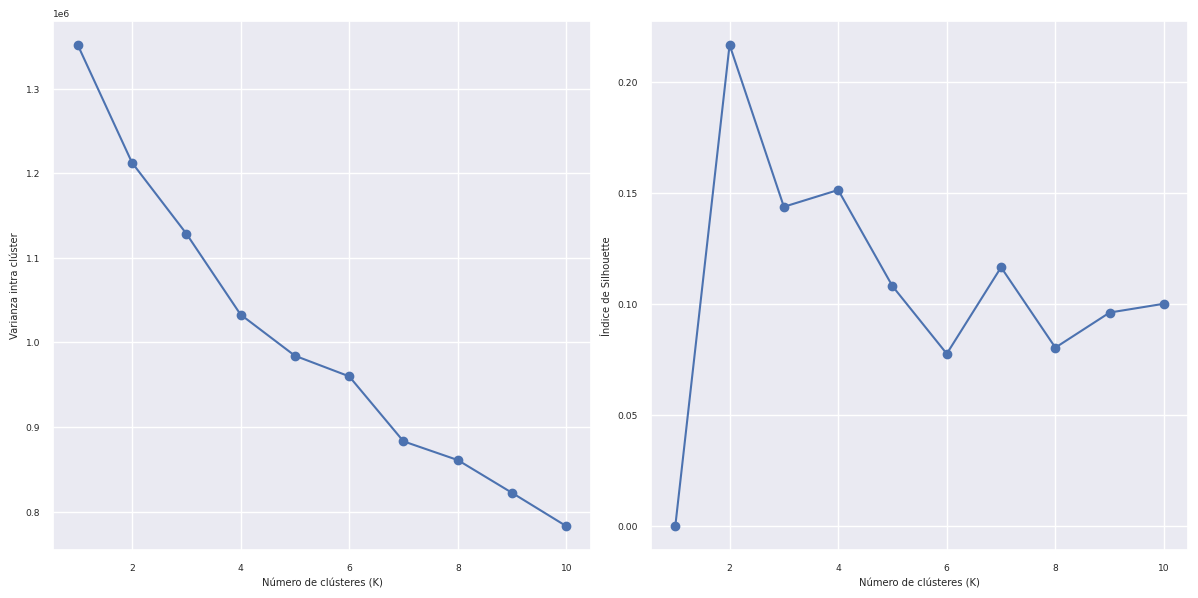

In [ ]:
X = df_scaled.values

varianza_intra_cluster = []
silhouettes = []
Y = {}  # Un diccionario para almacenar las etiquetas de los clústeres para cada valor de k

for k in range(1, 11):  # Evaluamos entre 1 a 10 clusters posibles
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)

    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0  # El índice de Silhouette solo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

plt.figure(figsize=(12, 6))

# Gráfico de la varianza intra-cluster
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')

# Gráfico del coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



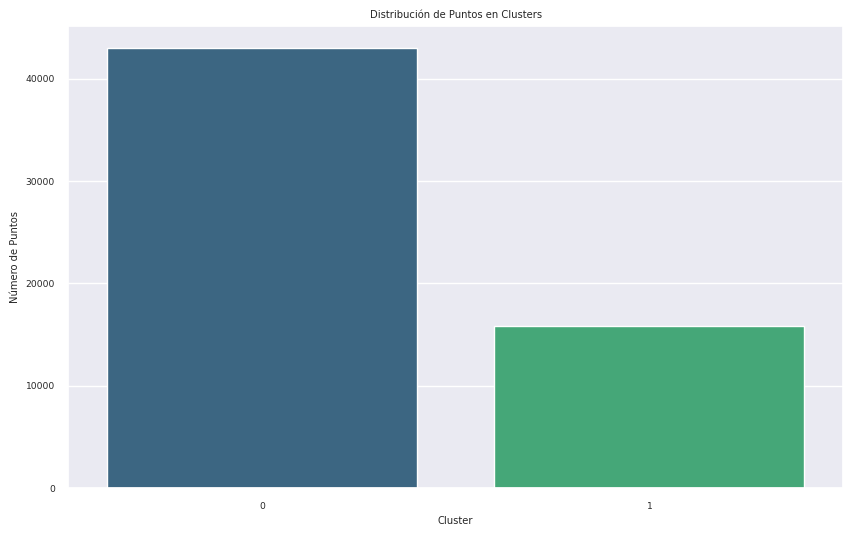

Número de clusters: 2
Silhouette Score: 0.21690682479618414
Varianza intra-cluster: 1212575.5492439047
           REGION  CANT_HOG_COMPLETOS  CANT_HOGARES_VIVIENDA     CLASE  \
Cluster                                                                  
0.0      3.728373            1.011715               1.011715  0.813369   
1.0      3.793286            1.013995               1.013995  0.812009   

            P1070     P4005     P4015     P4567  P8520S1A1   P8520S5  ...  \
Cluster                                                               ...   
0.0      1.372137  1.376288  4.765664  2.768443   1.936535  0.903325  ...   
1.0      1.362648  1.407565  4.782411  2.793002   1.889456  0.900142  ...   

          P4065S2   P4065S3   P5661S1   P5661S2   P5661S3   P5661S4   P5661S9  \
Cluster                                                                         
0.0      0.007001  0.017872  1.513949  1.541706  1.425400  1.416570  1.306772   
1.0      0.006241  0.019858  1.500709  1.557636 

In [ ]:
# Definir el número de clústeres K
k = 2

# Definir y ajustar el modelo K-Means para K clusters
kmeans = KMeans(n_clusters=k, random_state=123)
labels = kmeans.fit_predict(df_scaled)

# Visualizar la distribución de puntos en los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=labels, palette='viridis')
plt.title('Distribución de Puntos en Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.show()

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(df_scaled, labels)

# Imprimir el número de clusters y el índice de Silhouette
print(f'Número de clusters: {k}')
print(f'Silhouette Score: {silhouette_avg}')
# Imprimir la varianza intra-cluster
inertia = kmeans.inertia_
print(f'Varianza intra-cluster: {inertia}')

# Análisis detallado de los clusters
cluster_data = pd.concat([df, pd.Series(labels, name='Cluster')], axis=1)
cluster_summary = cluster_data.groupby('Cluster').mean()
# Imprimir el resumen de cada cluster
print(cluster_summary)

Se procede a evaluar la base de datos a través del análisis de clustering con el fin de determinar si hay subgrupos que expliquen diferentes poblaciones dentro de la base de datos.

Primero, se hace un análisis de k-medias, el objetivo de este algoritmo es dividir un conjunto de datos en grupos o clústeres, donde cada clúster contiene puntos de datos que son similares entre sí en función de alguna medida de distancia o similitud. Este algoritmo funciona a través de centroides asignados de forma aleatoria y asignación de puntos a través de su media, los cuales se van reasignando hasta que la información converge.

Este algoritmo requiere determinar el número de clusters (k) a priori, por lo cual se recurre a dos medidas guía para este, una es la varianza intra cluster la cual es una medida de la cohesión o la homogeneidad de los clústeres resultantes, una medida baja de esta medida podría indicar que los cluster tienen cierta similidad entre ellos. También nos valemos para el estudio del coeficiente de Silhouette, el cual, también es una medida que permite evaluar la calidad de un agrupamiento de clusters en algoritmos de aprendizaje no supervisado, un valor del score cercano a 1 indica que hay una buena asignación al los clusters, 0 indica que el punto a evaluar está entre el límite de dos clusters y valores cercanos a -1 indican asignación incorrecta a los clusters.

Para el problema, luego de analizar la información anterior y las gráficas resultantes se concluye que si bien no hay unanimidad entre las dos medidas si hay una evidencia más clara de que el número óptimo de clusters debe ser 2 acorde al índice de Silhouette por lo cuál se utiliza k=2 en el análisis de k medias.

Se realiza el algoritmo de K-medias, se imprime la distribución de puntos en las dos categorías con el fin de observar la distribución en ambos clusters y se imprimen tanto el coeficiente de Silhouette como la varianza intracluster, es interesante ver como el coeficiente de Silhouette toma el valor de 0.2125 lo cual, si bien apoya que no hay disparidad en el análisis y si hay cierta asertividad en la agrupación, tampoco se considera que esta sea del todo correcta.

Al analizar las medias de las columnas en cada uno de los clusters puede obsevarse como hay una predominancia de resultados mayores en el cluster 1 al cluster 0, esto podría dar una idea de una predominancia socioeconómica del cluster 1 sobre el 0, lo cual podría dar indicios de resultados positivos en encuestas de servicios públicos, ausencia de desastres naturales, entre otras.


In [ ]:
dfkmediods = df.copy()
X = dfkmediods.values

varianza_intra_cluster = []
silhouettes = []
Y = {}  # Un diccionario para almacenar las etiquetas de los clústeres para cada valor de k

for k in range(1, 11):  # Evaluamos entre 1 a 10 clusters posibles
    kmedoids = KMedoids(n_clusters=k, random_state=123).fit(X)
    varianza_intra_cluster.append(kmedoids.inertia_)

    try:
        silhouette = silhouette_score(X, kmedoids.labels_)
    except:
        silhouette = 0  # El índice de Silhouette solo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmedoids.labels_

plt.figure(figsize=(12, 6))

# Gráfico de la varianza intra-cluster
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')

# Gráfico del coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')

plt.tight_layout()
plt.show()


In [ ]:
dfkmediods = df.copy()
X = dfkmediods.values

# Definir el número de clústeres K (en este caso, K = 4)
k = 4

# Definir y ajustar el modelo K-Medoides para K clusters
kmedoids = KMedoids(n_clusters=k, random_state=123).fit(X)
labels = kmedoids.labels_

# Visualizar la distribución de puntos en los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=labels, palette='viridis')
plt.title('Distribución de Puntos en Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.show()

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, labels)

# Imprimir el número de clusters y el índice de Silhouette
print(f'Número de clusters: {k}')
print(f'Silhouette Score: {silhouette_avg}')

# Análisis detallado de los clusters
cluster_data = pd.concat([df, pd.Series(labels, name='Cluster')], axis=1)
cluster_summary = cluster_data.groupby('Cluster').mean()

# Imprimir el resumen de cada cluster
print(cluster_summary)


Luego, se hace hace un análisis de k-medoides, el objetivo de este algoritmo es dividir un conjunto de datos en grupos o clústeres, donde cada clúster contiene puntos de datos que son similares entre sí en función de alguna medida de distancia o similitud. Este algoritmo funciona a través de medoides, donde asigna una de las observaciones de forma aleatoria y realiza luego una asignación de puntos a través de su media, los medoides se van reasignando a otras observaciones en medio de este proceso hasta que la información converge.
Este algoritmo requiere determinar el número de clusters (k) a priori, por lo cual se recurre a dos medidas guía para este, una es la varianza intra cluster la cual es una medida de la cohesión o la homogeneidad de los clústeres resultantes, una medida baja de esta medida podría indicar que los cluster tienen cierta similidad entre ellos. También nos valemos para el estudio del coeficiente de Silhouette, el cual, también es una medida que permite evaluar la calidad de un agrupamiento de clusters en algoritmos de aprendizaje no supervisado, un valor del score cercano a 1 indica que hay una buena asignación al los clusters, 0 indica que el punto a evaluar está entre el límite de dos clusters y valores cercanos a -1 indican asignación incorrecta a los clusters.
Para el problema, luego de analizar la información anterior y las gráficas resultantes se concluye que si bien no hay unanimidad entre las dos medidas si hay una evidencia más clara de que el número óptimo de clusters debe ser 4 acorde al índice de Silhouette por lo cuál se utiliza k=4 en el análisis de k medias.

Se realiza el algoritmo de K-medoides, se imprime la distribución de puntos en las dos categorías con el fin de observar la distribución en ambos clusters y se imprimen tanto el coeficiente de Silhouette como la varianza intracluster, es interesante ver como el coeficiente de Silhouette toma el valor de 0.05189 lo cual, si bien apoya que no hay disparidad en el análisis y si hay cierta asertividad en la agrupación, tampoco se considera que esta sea del todo correcta.

Al analizar las medias de las columnas en cada uno de los clusters puede obsevarse como hay una predominancia de resultados mayores en el segundo cluster, luego en el tarcero y luego en el promero, esto podría dar un indicio de resultados positivos en encuestas de servicios públicos, ausencia de desastres naturales, entre otras, se podría pensar en una distribución de tipo socioeconómico.


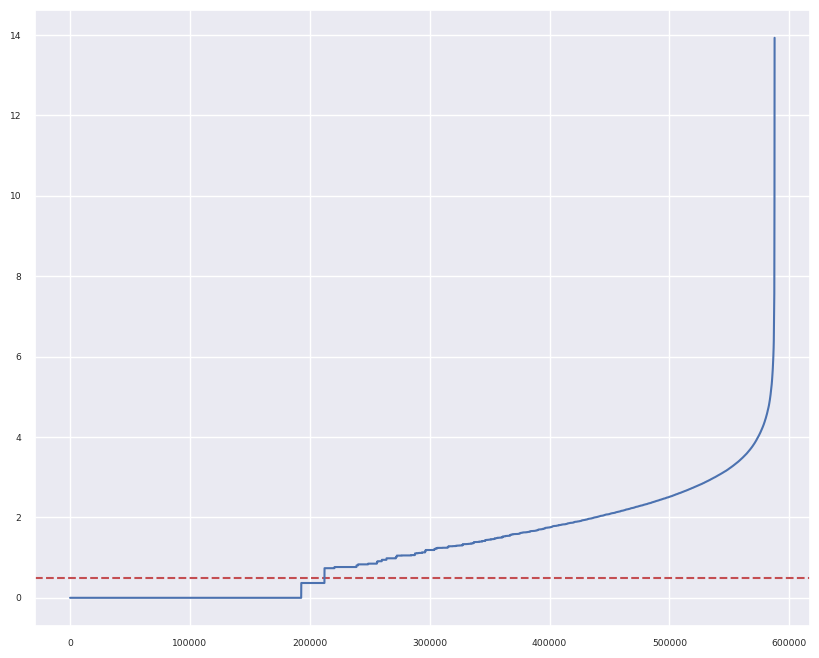

In [ ]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(df_scaled)
distancias, indices = nbrs.kneighbors(df_scaled)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [ ]:
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

2.5827850248701436


In [ ]:
db = DBSCAN(eps = 3.0203, min_samples = 46).fit(df_scaled)
db

DBSCAN(eps=3.0203, min_samples=46)

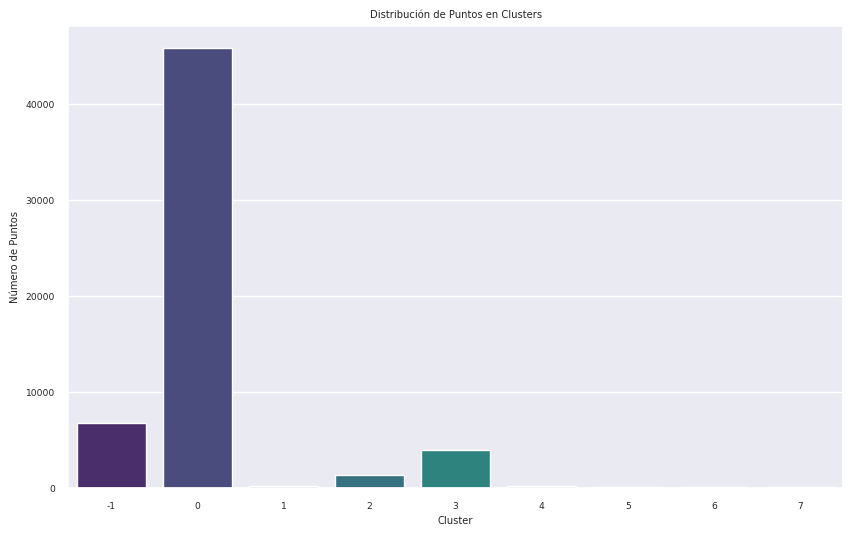

Número de clusters: 8
Silhouette Score: 0.15699457211550927
           REGION  CANT_HOG_COMPLETOS  CANT_HOGARES_VIVIENDA     CLASE  \
Cluster                                                                  
-1.0     3.841128            1.018357               1.018357  0.809003   
 0.0     3.724243            1.011732               1.011732  0.810510   
 1.0     4.200000            1.006061               1.006061  0.896970   
 2.0     3.686957            1.011957               1.011957  0.816304   
 3.0     3.815984            1.010136               1.010136  0.839766   
 4.0     3.610063            1.006289               1.006289  0.811321   
 5.0     4.140845            1.000000               1.000000  0.704225   
 6.0     3.984375            1.015625               1.015625  0.968750   
 7.0     3.823529            1.000000               1.000000  0.941176   

            P1070     P4005     P4015     P4567  P8520S1A1   P8520S5  ...  \
Cluster                                         

In [ ]:
# Estandarizar los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Definir y ajustar el modelo DBSCAN
db = DBSCAN(eps=3.0203, min_samples=46)
labels = db.fit_predict(df_scaled)

# Conteo de puntos en cada cluster (incluyendo puntos ruidosos, etiquetados como -1)
cluster_counts = pd.Series(labels).value_counts()

# Visualizar la distribución de puntos en los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=labels, palette='viridis')
plt.title('Distribución de Puntos en Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.show()

# Métricas para evaluar la calidad de los clusters (ignorando puntos ruidosos, etiquetados como -1)
if -1 in labels:
    n_clusters = len(set(labels)) - 1
else:
    n_clusters = len(set(labels))

silhouette_avg = metrics.silhouette_score(df_scaled, labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(df_scaled, labels)

print(f'Número de clusters: {n_clusters}')
print(f'Silhouette Score: {silhouette_avg}')
#print(f'Calinski-Harabasz Score: {calinski_harabasz_score}')

# Análisis detallado de los clusters
cluster_data = pd.concat([df, pd.Series(labels, name='Cluster')], axis=1)
cluster_summary = cluster_data.groupby('Cluster').mean()

# Imprimir el resumen de cada cluster
print(cluster_summary)


Luego, se hace hace un análisis de clustering a través de DBSCAN, el cual es un algoritmo un poco más robusto, el objetivo de este algoritmo es dividir un conjunto de datos en grupos o clústeres, donde cada clúster contiene puntos de datos que son similares entre sí en función de alguna medida de distancia o similitud todo esto se hace a través del concepto de densidad.
Este algoritmo no requiere determinar el número de clusters (k) a priori, sin embargo, si se requiere indicar el radio del vecindario y el mínimo de muestras, con el fin de optimizar estos hiperparámetros, mediante el uso de la función “NearestNeighbors” de la librería “sklearn.neighbors” y “KneeLocator” de le librería “kneed” se calcula el valor óptimo del radio del vecindario el cual es 3.0203, luego, ya que tenemos 23 dimensiones, se procede a usar 2*23 = 46 como el mínimo de muestras a considerar dentro del radio de densidad por punto.

Para el problema, luego de analizar la información anterior, graficar y realizar el algoritmo, se puede observar que el algoritmo ha clasificado nuestra base de datos en 5 cluster diferentes, se grafica la distribución de puntos y se notan ciertas clases predominantes, esto tiene sentido ya que el algoritmo se basa en densidad de puntos cercanos y pueden haber ciertas mayorías en la base de datos, por ejemplo se podría pensar que la clase media podría predominar.

Al analizar las medias de las columnas en cada uno de los clusters puede obsevarse como hay una predominancia de resultados mayores en el segundo cluster, luego en el tarcero y luego en el primero, esto podría dar un indicio de resultados positivos en encuestas de servicios públicos, ausencia de desastres naturales, entre otras, se podría pensar en una distribución de tipo socioeconómico. Esto es soportado por el cuadro comparativo de medias de cada cluster, es muy interesante resaltar por ejemplo como la distribución de puntos en el último cluster es muy baja, al analizar la variable P8520S1A1 la cual muestra el estrato socioeconómico es mucho más alto que en las otras variables, lo cual puede dar a entender que este cluster se podría estar enfocando en un segmento de la población de más altos estratos.


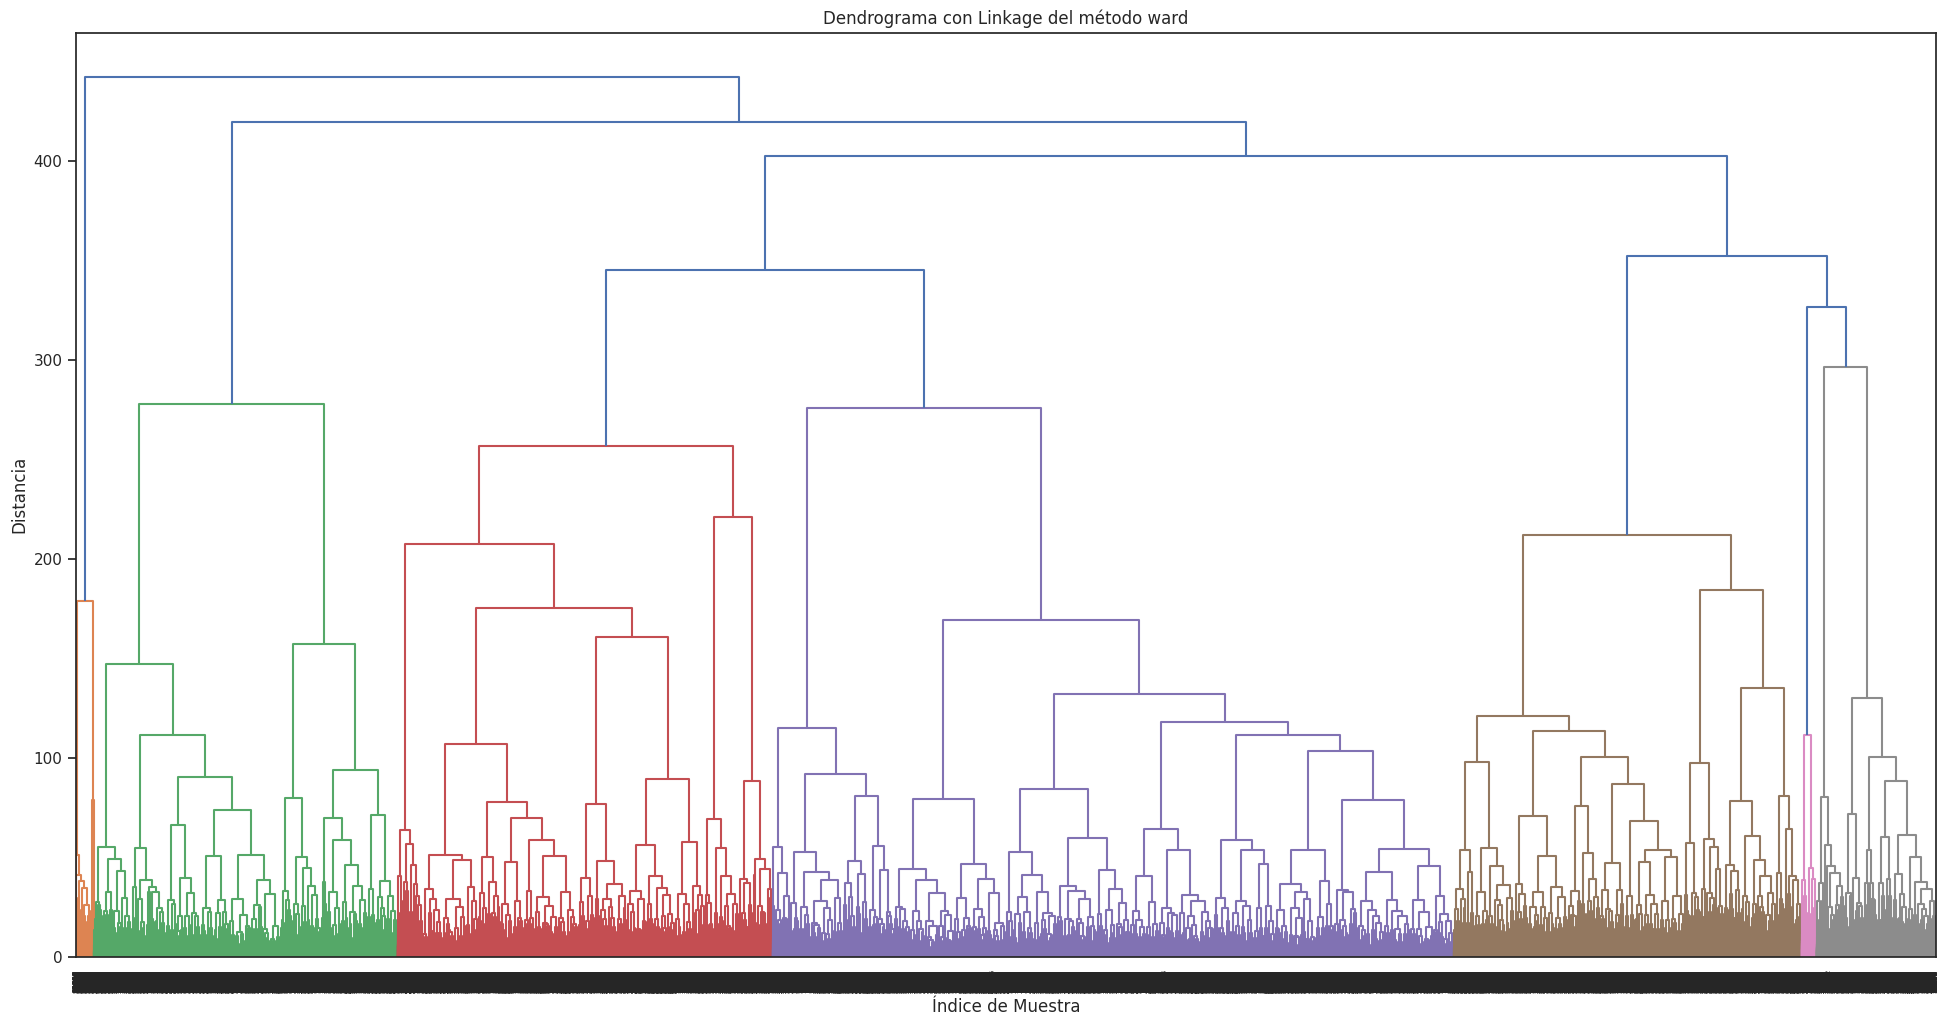

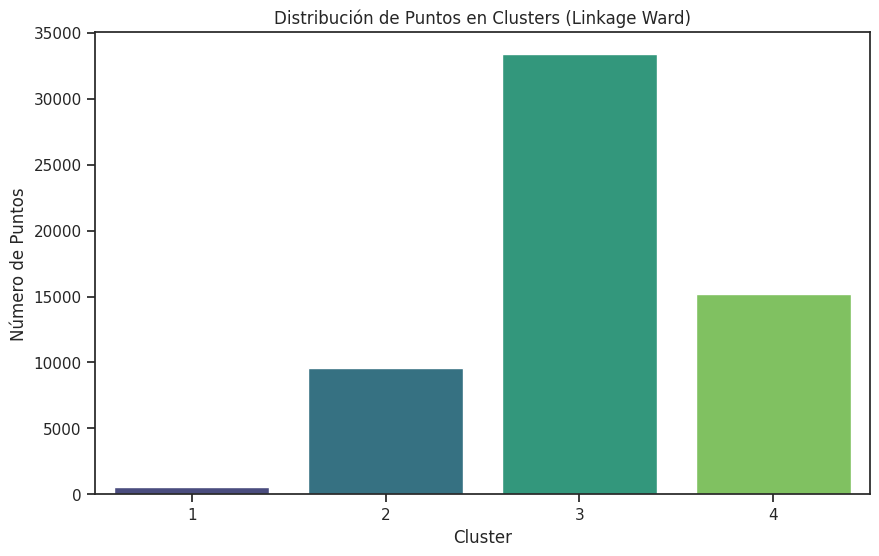

Resultados para Linkage Ward:
           DIRECTORIO    REGION  P1_DEPARTAMENTO  CANT_HOG_COMPLETOS  \
Cluster                                                                
1.0      7.153942e+06  3.764103        44.223077            1.017949   
2.0      7.157093e+06  3.826214        46.438997            1.010194   
3.0      7.156479e+06  3.680309        45.132643            1.012708   
4.0      7.155323e+06  3.837953        45.319442            1.012599   

         CANT_HOGARES_VIVIENDA     CLASE     P1070     P4005     P4015  \
Cluster                                                                  
1.0                   1.017949  0.838462  1.356410  1.333333  4.684615   
2.0                   1.010194  0.814401  1.353883  1.454854  4.836408   
3.0                   1.012708  0.809696  1.374593  1.367357  4.758774   
4.0                   1.012599  0.818279  1.368676  1.382051  4.758286   

            P4567  ...   P5661S2   P5661S3   P5661S4   P5661S9   P5661S5  \
Cluster         

In [ ]:
X = df_scaled

# Realizar el clustering jerárquico
Z = linkage(X, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(24, 12))
dendrogram(Z)
plt.title(f'Dendrograma con Linkage del método ward')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

max_d = 370  # Ajusta la altura, después de varias iteraciones de deja en 370 para que tome 4 clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Visualizar la distribución de puntos en los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters, palette='viridis')
plt.title(f'Distribución de Puntos en Clusters (Linkage Ward)')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.show()

# Análisis detallado de los clusters
cluster_data = pd.concat([df, pd.Series(clusters, name='Cluster')], axis=1)
cluster_summary = cluster_data.groupby('Cluster').mean()

# Imprimir el resumen de cada cluster
print(f'Resultados para Linkage Ward:')
print(cluster_summary)

Para finalizar el análisis de cluster, se hace hace un análisis de clustering jerárquico, el cual es particularmente útil cuando hay jerarquías en los datos, dado que pueden haber diferentes clases económicas, se utiliza para el estudio.

Se probaron diferentes códigos y diferentes funciones de linkage, al final se optó por hacer enlaces de “Ward” ya que parecían representar la jerarquía de una forma más adecuada, también, al graficar el dendogramase decide cortar a la altura de 370 en cuanto a su gráfico de si disimilitud, esto con el fin de ir en línea con los análisis anteriores y así distribuir el estudio en 4 clusters.

Se analiza la gráfica y puede apreciarse que la distribución de las clases es muy diferente, habiendo más predominancia de elementos en el tercer cluster y luego en el cuarto, siguiendo con el segundo y luego el primero.
Al comparar esto con los resúmenes de clusters, es interesante observar cómo los clusters 1 y 2 que tienen las minorías del estudio, parecen ser a su vez los que tienen resultados relacionados a estatos más elevados en el estudio.
